# Methodology section

## Plotting anomaly patterns

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cl_sensor = 14
filename = '/storage_1/aDetection/data/s{}_20Hz_realset.csv'.format(cl_sensor)
df_si = pd.read_csv(filename,index_col=0)

df_si.head()

/home/svladimir/anaconda3/envs/pytorch/lib/python3.7/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,reading,label,cat_label,anomaly,sensor,missing,normal,outlier,saturated,square,set_type
0,0.196260,normal,0,0,14,0,1,0,0,0,testset
1,0.196729,missing,1,1,14,1,0,0,0,0,testset
2,0.196276,outlier,2,1,14,0,0,1,0,0,testset
3,0.196745,square,3,1,14,0,0,0,0,1,testset
4,0.196260,saturated,4,1,14,0,0,0,1,0,testset


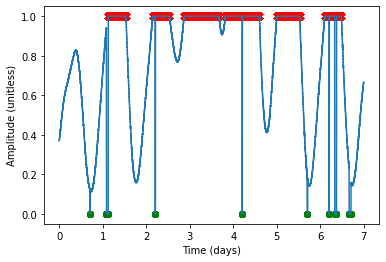

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
to_save = '/home/svladimir/DNN-CAE/experiments/paper_figures/methodology_anomalies.png'

day = 20*60*60*24
rang = 7
to_plot = df_si.loc[5:rang*day+5]
scaler.fit(to_plot.loc[:,['reading']])

x_tick = np.arange(0,rang*day+1,day)
x_ltick = np.arange(0,rang+1)
f_miss = to_plot['label'] == 'missing' # values are set to 0 for math purpose
f_sat  = to_plot['label'] == 'saturated'
f_sqr  = to_plot['label'] == 'square'
f_norm = to_plot['label'] == 'normal'

df_missing= to_plot.loc[f_miss,['reading']]
df_square = to_plot.loc[f_sqr,['reading']]
df_saturated= to_plot.loc[f_sat,['reading']]


fig, ax = plt.subplots(1,1,sharex=False)#,figsize=(15, 5))
ax.plot(scaler.transform(to_plot.loc[:,['reading']]))
ax.scatter(df_saturated.index,scaler.transform(df_saturated),c='r',marker='x')
ax.scatter(df_missing.index,df_missing['reading'],c='g',marker='o')
ax.set_ylabel('Amplitude (unitless)')
ax.set_xlabel('Time (days)')
ax.set_xticks(x_tick,x_ltick)

plt.savefig(to_save,dpi=600)
plt.show()

# Dataset description section

## 20 Sensors plot

In [1]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt

In [3]:
path = '/home/svladimir/anomaly_detection/mat_data/2012-01-'
day_list = [i for i in range(1,31)]
# day_list = [12,13]#,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

col = ['s_'+str(i) for i in range(1,39)]
data = pd.DataFrame({},columns=col)
for day in day_list:
    for hour in range(24):
        filename = path+str(day).zfill(2)+'_'+str(hour).zfill(2)+'-VIB.mat'
        print('loading '+filename)
        aux = mat = scipy.io.loadmat(filename)
        h_aux = aux['data']
        data = pd.concat([data,pd.DataFrame(h_aux,columns=col)])
date = '2012-01-01 '
start_hour = 0

start = date + str(start_hour).zfill(2)+':00'
data['datetime'] = pd.date_range(start, periods=len(day_list)*24*60*60*20,freq='50ms')
data.set_index('datetime',inplace=True)
data

loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_00-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_01-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_02-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_03-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_04-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_05-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_06-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_07-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_08-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_09-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_10-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_11-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_12-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_29,s_30,s_31,s_32,s_33,s_34,s_35,s_36,s_37,s_38
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00.000,0.001714,-0.000164,0.002266,0.000921,-0.002263,-0.000644,0.005450,-0.001081,0.001869,-0.003042,...,0.017006,0.010236,0.011215,-0.009256,0.003815,-0.001416,-0.002067,0.006278,0.011814,-0.005823
2012-01-01 00:00:00.050,0.001731,-0.000180,0.002233,0.000516,0.007903,-0.000433,-0.005895,-0.000708,-0.000305,-0.002831,...,0.015124,0.010071,0.012123,-0.009256,0.004303,-0.001664,-0.002231,0.005788,0.011485,-0.004678
2012-01-01 00:00:00.100,0.001731,-0.000213,0.002266,0.001423,-0.003299,-0.000579,-0.010627,-0.000400,-0.000533,-0.002605,...,0.015124,0.010236,0.011876,-0.009092,0.006663,-0.001912,-0.001244,0.006605,0.009595,-0.007949
2012-01-01 00:00:00.150,0.001714,-0.000213,0.002250,0.000872,-0.013413,-0.000303,-0.002054,-0.000676,-0.000385,-0.003528,...,0.017169,0.010236,0.011463,-0.005986,0.004547,-0.000755,-0.000340,0.006605,0.011239,-0.005987
2012-01-01 00:00:00.200,0.001714,-0.000196,0.002250,-0.000051,-0.004684,-0.000012,0.005790,-0.001324,0.003640,-0.003869,...,0.015615,0.009988,0.013528,-0.007294,0.003815,-0.000507,-0.001409,0.005052,0.010417,-0.006641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-01-30 23:59:59.750,NaN,NaN,NaN,NaN,-0.005902,-0.000174,-0.000611,-0.000870,0.004391,-0.002135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-30 23:59:59.800,NaN,NaN,NaN,NaN,-0.000864,-0.000190,-0.004485,-0.000660,-0.003659,-0.002637,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-30 23:59:59.850,NaN,NaN,NaN,NaN,0.004433,-0.001081,-0.003528,0.000053,-0.009092,-0.001908,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def maxMin(df):
    return df.max(),df.min()

def scaleTS(df,s_s,s_d):
    df_s = df['s_'+str(s_s)]
    max_d,min_d = maxMin(df['s_'+str(s_d)])
    max_s,min_s = maxMin(df_s)
    f = (max_s-min_s)/(max_d-min_d)
    df['s_'+str(s_s)] = (df_s-min_s)/f+min_d
    
s_l = np.arange(29,31)
s_d = 4
for s in s_l:
    scaleTS(data,s,s_d)
s_l = np.arange(33,36)
s_d = 27
for s in s_l:
    scaleTS(data,s,s_d)
    
s_l = [i for i in range(1,5)] + [i for i in range(13,20)] + [i for i in range(25,31)] + [i for i in range(33,36)]
s_str = ['s_'+str(i) for i in s_l]
df_reduced = data.loc[:,s_str]
df_reduced.reset_index(inplace=True)
df_reduced.head(3)

,datetime,s_1,s_2,s_3,s_4,s_13,s_14,s_15,s_16,s_17,...,s_19,s_25,s_26,s_27,s_28,s_29,s_30,s_33,s_34,s_35
0,2012-01-01 00:00:00.000,0.001714,-0.000164,0.002266,0.000921,0.196306,0.196260,0.196232,0.196267,0.165001,...,0.162131,0.002509,0.002757,0.000139,0.000683,0.003367,0.002006,0.000712,-0.000159,-0.000268
1,2012-01-01 00:00:00.050,0.001731,-0.000180,0.002233,0.000516,0.196775,0.196729,0.196718,0.196720,0.165396,...,0.162533,0.008574,0.002773,-0.002733,0.000748,0.002994,0.001974,0.000794,-0.000200,-0.000295
2,2012-01-01 00:00:00.100,0.001731,-0.000213,0.002266,0.001423,0.196338,0.196276,0.196216,0.196250,0.164987,...,0.162131,0.004868,0.003761,-0.001631,0.000748,0.002994,0.002006,0.001189,-0.000240,-0.000131


In [15]:
h_div = 5
v_div = 4
fig, ax = plt.subplots(v_div, h_div,sharex=True,figsize=(18, 2*v_div))
size = 20*60*60*24*30
d_separation = 5
x_label = [i for i in range(0,31,d_separation)]
x_space = 20*60*60*24*d_separation
c = 0
rang = 10**9
s_block_l = ['Sensor {}, block {}'.format(i,1) for i in range(1,5)]+\
    ['Sensor {}, block {}'.format(i,3) for i in range(13,20)]+\
    ['Sensor {}, block {}'.format(i,4) for i in range(25,29)]+\
    ['Sensor {}, block {}'.format(i,5) for i in range(29,31)]+\
    ['Sensor {}, block {}'.format(i,7) for i in range(33,36)]

for i in range (len(s_l)):
    c = i%h_div
    r = int(i/h_div)
    ax[r,c].plot(df_reduced.iloc[:rang,i+1])
    ax[r,c].set_title(s_block_l[i])

for i in range(h_div):
    ax[v_div-1,i].set_xlabel('time (days)')
plt.xticks(np.arange(0,size+1,x_space),labels=x_label)
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp_20_sensors.png'
plt.savefig(path+file,dpi=300)
# plt.show()
fig.clear()
plt.close()

In [7]:
fig.clear()
plt.close()

## Ploting anomaly paterns

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
sensor_list = [4,14,27]
sensor_n = sensor_list[0]
sensor = 's_'+str(sensor_n)
path = '/home/svladimir/anomaly_detection/'
df_si = pd.read_csv(path+'s{}_2012-01-01_to_31-20Hz.csv'.format(str(sensor_n)))
df_si['datetime'] = pd.to_datetime(df_si['datetime'])
df_si.set_index('datetime',drop=True,inplace=True)
for i in range(1,len(sensor_list)):
    sensor_n = sensor_list[i]
    sensor = 's_'+str(sensor_n)
    data = pd.read_csv(path+'s{}_2012-01-01_to_31-20Hz.csv'.format(str(sensor_n)))
    data['datetime'] = pd.to_datetime(data['datetime'])
    data.set_index('datetime',drop=True,inplace=True)
    df_si[sensor] = data
df_si.head()

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [ ]:
fig, ax = plt.subplots(3,1,figsize=(8, 8))

start = '2012-01-01 00:00'
end   = '2012-01-01 08:00'
start_dt = pd.to_datetime(start)
end_dt = pd.to_datetime(end)
sensor = 27
sensor = 's_'+str(sensor)
to_plot = df_si.loc[start_dt:end_dt,sensor].reset_index(drop=True)

h = 1
xticks = np.arange(0,len(to_plot),20*60*60*h)
xticks_label = [str(i*h)+'h' for i in range(len(xticks))]
ax[0].plot(to_plot)
ax[0].set_ylabel('Missing')
plt.sca(ax[0])
plt.xticks(xticks,labels=xticks_label)

start = '2012-01-01 00:00'
end   = '2012-01-05 00:00'
start_dt = pd.to_datetime(start)
end_dt = pd.to_datetime(end)
sensor = 14
sensor = 's_'+str(sensor)
to_plot = df_si.loc[start_dt:end_dt,sensor].reset_index(drop=True)

h = 8
xticks = np.arange(0,len(to_plot),20*60*60*h)
xticks_label = [str(i*h)+'h' for i in range(len(xticks))]
ax[1].plot(to_plot)
ax[1].set_ylabel('Saturated and missing')
plt.sca(ax[1])
plt.xticks(xticks,labels=xticks_label)



start = '2012-01-06 00:00:07'
end   = '2012-01-06 00:00:35'
start_dt = pd.to_datetime(start)
end_dt = pd.to_datetime(end)
sensor = 4
sensor = 's_'+str(sensor)
to_plot = df_si.loc[start_dt:end_dt,sensor].reset_index(drop=True)

s = 5
xticks = np.arange(0,len(to_plot),20*s)
xticks_label = [str(i*s)+'s' for i in range(len(xticks))]
ax[2].plot(to_plot)
ax[2].set_ylabel('Square and saturated')
plt.sca(ax[2])
plt.xticks(xticks,labels=xticks_label)

path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp_anomalies.png'
plt.savefig(path+file,dpi=300)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

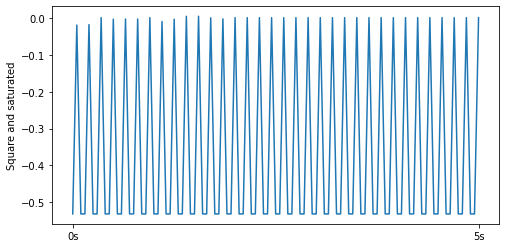

In [11]:
fig, ax = plt.subplots(1,1,figsize=(8, 4))

start = '2012-01-06 00:00:10'
end   = '2012-01-06 00:00:15'
start_dt = pd.to_datetime(start)
end_dt = pd.to_datetime(end)
sensor = 4
sensor = 's_'+str(sensor)
to_plot = df_si.loc[start_dt:end_dt,sensor].reset_index(drop=True)

s = 5
xticks = np.arange(0,len(to_plot),20*s)
xticks_label = [str(i*s)+'s' for i in range(len(xticks))]
ax.plot(to_plot)
ax.set_ylabel('Square and saturated')
plt.sca(ax)
plt.xticks(xticks,labels=xticks_label)
plt.show

# Experimental Setup section

# Experimental Results section

## Experimental results Clustering results

In [1]:
import pandas as pd
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tslearn.metrics import dtw, dtw_path

### Loading full dataset

In [2]:
path = '/home/svladimir/anomaly_detection/mat_data/2012-01-'
day_list = [i for i in range(1,31)]
# day_list = [12,13]#,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

col = ['s_'+str(i) for i in range(1,39)]
data = pd.DataFrame({},columns=col)
for day in day_list:
    for hour in range(24):
        filename = path+str(day).zfill(2)+'_'+str(hour).zfill(2)+'-VIB.mat'
        print('loading '+filename)
        aux = mat = scipy.io.loadmat(filename)
        h_aux = aux['data']
        data = pd.concat([data,pd.DataFrame(h_aux,columns=col)])
    
date = '2012-01-01 '
start_hour = 0

start = date + str(start_hour).zfill(2)+':00'
data['datetime'] = pd.date_range(start, periods=len(day_list)*24*60*60*20,freq='50ms')
data.set_index('datetime',inplace=True)
data.head()

loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_00-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_01-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_02-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_03-VIB.mat


/tmp/ipykernel_45579/1770188451.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data,pd.DataFrame(h_aux,columns=col)])


loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_04-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_05-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_06-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_07-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_08-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_09-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_10-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_11-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_12-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_13-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_14-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_15-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/2012-01-01_16-VIB.mat
loading /home/svladimir/anomaly_detection/mat_data/

,s_1,s_2,s_3,s_4,s_5,s_6,s_7,s_8,s_9,s_10,...,s_29,s_30,s_31,s_32,s_33,s_34,s_35,s_36,s_37,s_38
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:00:00.000,0.001714,-0.000164,0.002266,0.000921,-0.002263,-0.000644,0.005450,-0.001081,0.001869,-0.003042,...,0.017006,0.010236,0.011215,-0.009256,0.003815,-0.001416,-0.002067,0.006278,0.011814,-0.005823
2012-01-01 00:00:00.050,0.001731,-0.000180,0.002233,0.000516,0.007903,-0.000433,-0.005895,-0.000708,-0.000305,-0.002831,...,0.015124,0.010071,0.012123,-0.009256,0.004303,-0.001664,-0.002231,0.005788,0.011485,-0.004678
2012-01-01 00:00:00.100,0.001731,-0.000213,0.002266,0.001423,-0.003299,-0.000579,-0.010627,-0.000400,-0.000533,-0.002605,...,0.015124,0.010236,0.011876,-0.009092,0.006663,-0.001912,-0.001244,0.006605,0.009595,-0.007949
2012-01-01 00:00:00.150,0.001714,-0.000213,0.002250,0.000872,-0.013413,-0.000303,-0.002054,-0.000676,-0.000385,-0.003528,...,0.017169,0.010236,0.011463,-0.005986,0.004547,-0.000755,-0.000340,0.006605,0.011239,-0.005987
2012-01-01 00:00:00.200,0.001714,-0.000196,0.002250,-0.000051,-0.004684,-0.000012,0.005790,-0.001324,0.003640,-0.003869,...,0.015615,0.009988,0.013528,-0.007294,0.003815,-0.000507,-0.001409,0.005052,0.010417,-0.006641


### Selecting sensors with anomalies and resampling (testing phase)

In [3]:
def maxMin(df):
    return df.max(),df.min()

def scaleTS(df,s_s,s_d):
    df_s = df['s_'+str(s_s)]
    max_d,min_d = maxMin(df['s_'+str(s_d)])
    max_s,min_s = maxMin(df_s)
    f = (max_s-min_s)/(max_d-min_d)
    df['s_'+str(s_s)] = (df_s-min_s)/f+min_d
    
s_l = np.arange(29,31)
s_d = 4
for s in s_l:
    scaleTS(data,s,s_d)
s_l = np.arange(33,36)
s_d = 27
for s in s_l:
    scaleTS(data,s,s_d)
    
# s_l = ['s_'+str(i) for i in range(1,5)]+['s_'+str(i) for i in range(13,31)]+['s_'+str(i) for i in range(33,36)]
# s_l = ['s_'+str(i) for i in range(1,29)]
s_l = [i for i in range(1,5)] + [i for i in range(13,20)] + [i for i in range(25,31)] + [i for i in range(33,36)]
s_str = ['s_'+str(i) for i in s_l]
df_reduced = data.loc[:,s_str]
df_resampled = df_reduced.resample('10min',label='right').sum()
df_resampled.reset_index(inplace=True)
df_resampled.head(3)

,datetime,s_1,s_2,s_3,s_4,s_13,s_14,s_15,s_16,s_17,...,s_19,s_25,s_26,s_27,s_28,s_29,s_30,s_33,s_34,s_35
0,2012-01-01 00:10:00,20.614982,-2.533114,27.207471,8.125509,2407.287403,2406.719526,2406.380509,2406.605133,2023.394504,...,1988.371243,23.612869,39.824600,13.236274,8.040926,39.714335,23.905150,11.144789,-2.344213,-1.030322
1,2012-01-01 00:20:00,20.568464,-2.571916,27.201728,8.123151,2501.926842,2501.341237,2500.985880,2501.221925,2102.945439,...,2066.543733,23.793573,39.966978,13.260263,8.035476,39.750009,23.900685,11.152221,-2.340525,-1.020272
2,2012-01-01 00:30:00,20.602360,-2.695522,27.205070,8.099741,2590.481986,2589.872391,2589.508912,2589.749880,2177.378962,...,2139.689240,23.927096,39.902721,13.271426,8.025320,39.717276,23.894548,11.153817,-2.337284,-1.025743


### Ploting 20 sensors resampled at 10 min/sample

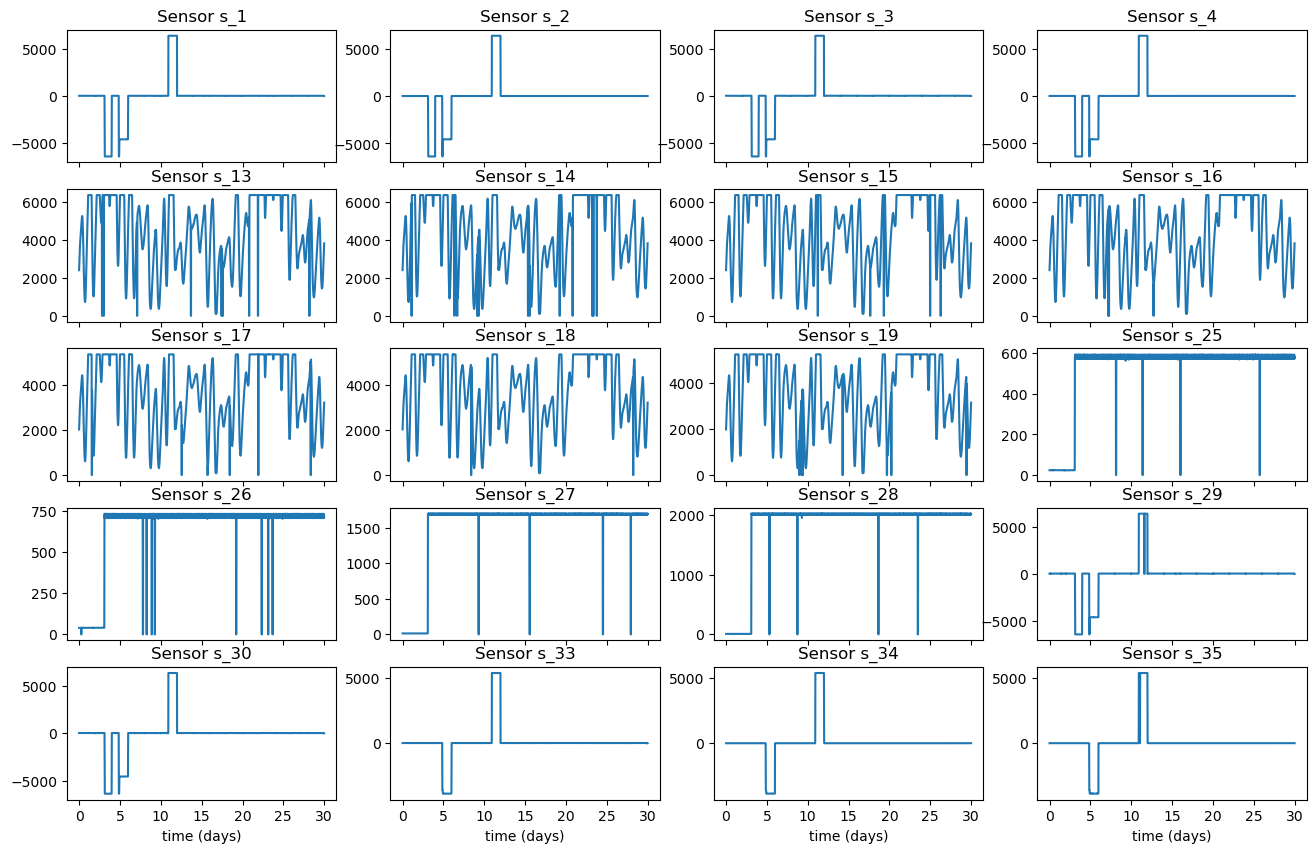

In [4]:
h_div = 4
v_div = 5
fig, ax = plt.subplots(v_div, h_div,sharex=True,figsize=(16, 2*v_div))
size = 6*24*30
d_separation = 5
x_label = [i for i in range(0,31,d_separation)]
x_space = 6*24*d_separation
c = 0

for i in range(len(s_l)):
    c = i%h_div
    r = int(i/h_div)
    ax[r,c].plot(df_resampled.iloc[:,i+1])
    ax[r,c].set_title('Sensor '+s_str[i])

for i in range(h_div):
    ax[v_div-1,i].set_xlabel('time (days)')
plt.xticks(np.arange(0,size+1,x_space),labels=x_label)
# file = 'resampled all sensors 1 month.png'.format(start,end)
plt.show()
# plt.savefig(file)
fig.clear()
plt.close()

In [5]:
df_resampled.set_index('datetime',inplace=True)
df_resampled.head(3)

,s_1,s_2,s_3,s_4,s_13,s_14,s_15,s_16,s_17,s_18,s_19,s_25,s_26,s_27,s_28,s_29,s_30,s_33,s_34,s_35
datetime,,,,,,,,,,,,,,,,,,,,
2012-01-01 00:10:00,20.614982,-2.533114,27.207471,8.125509,2407.287403,2406.719526,2406.380509,2406.605133,2023.394504,2021.039603,1988.371243,23.612869,39.824600,13.236274,8.040926,39.714335,23.905150,11.144789,-2.344213,-1.030322
2012-01-01 00:20:00,20.568464,-2.571916,27.201728,8.123151,2501.926842,2501.341237,2500.985880,2501.221925,2102.945439,2100.497825,2066.543733,23.793573,39.966978,13.260263,8.035476,39.750009,23.900685,11.152221,-2.340525,-1.020272
2012-01-01 00:30:00,20.602360,-2.695522,27.205070,8.099741,2590.481986,2589.872391,2589.508912,2589.749880,2177.378962,2174.843335,2139.689240,23.927096,39.902721,13.271426,8.025320,39.717276,23.894548,11.153817,-2.337284,-1.025743


## Clustering 20 sensors reampled into 4 clusters

In [6]:
sample_size = len(df_resampled)
ts_data = np.zeros([len(s_l),sample_size])
for i in range(len(s_l)):
    ts_data[i] = df_resampled.iloc[:,i].values

Euclidean k-means
227.466 --> 140.012 --> 140.012 --> 
DBA k-means
Init 1


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 co

105.753 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.6s finished


42.259 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


42.203 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


42.202 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


42.202 --> 
Init 2


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 co

105.449 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


45.432 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


45.376 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


45.375 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


45.375 --> 
Init 3


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  20 out of  20 | elapsed:    0.5s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.2s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  58 out of  60 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=32)]: Done  60 out of  60 | elapsed:    1.1s finished
[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 co

228.666 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


103.852 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


103.826 --> 

[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.6s finished


103.826 --> 


[Parallel(n_jobs=32)]: Using backend ThreadingBackend with 32 concurrent workers.
[Parallel(n_jobs=32)]: Done  80 out of  80 | elapsed:    1.5s finished


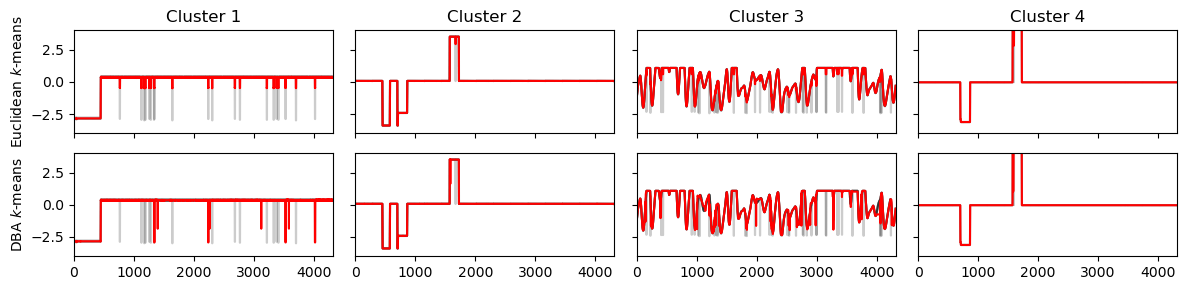

In [7]:
# Author: Romain Tavenard
# License: BSD 3 clause

import numpy
import matplotlib.pyplot as plt

from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.metrics import dtw

seed = 123
n_clusters = 4
X_train = ts_data

X_train = TimeSeriesScalerMeanVariance().fit_transform(X_train)
# Make time series shorter
# X_train = TimeSeriesResampler(sz=40).fit_transform(X_train)
sz = X_train.shape[1]

# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=n_clusters, verbose=True, random_state=seed)
y_euclidean = km.fit_predict(X_train)

# DBA-k-means
print("DBA k-means")
dtw_km = TimeSeriesKMeans(n_clusters=n_clusters,
                          n_init=3,
                          metric="dtw",
                          verbose=True,
                          n_jobs=32,
                          max_iter_barycenter=100,
                          random_state=seed)
y_dtw = dtw_km.fit_predict(X_train)



#plotting results
fig, axs = plt.subplots(2, n_clusters,sharex=True,sharey=True,figsize=(3*n_clusters, 3))


i = 0
for j in range(n_clusters):
    for ts in X_train[y_euclidean == j]:
        axs[i,j].plot(ts.ravel(), "k-", alpha=.2)
        axs[i,j].set_title('Cluster %d' % (j + 1))
    axs[i,j].plot(km.cluster_centers_[j].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    axs[i,0].set_ylabel("Euclidean $k$-means")

i = 1
for j in range(n_clusters):
    for ts in X_train[y_dtw == j]:
        axs[i,j].plot(ts.ravel(), "k-", alpha=.2)
    axs[i,j].plot(dtw_km.cluster_centers_[j].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    axs[i,0].set_ylabel("DBA $k$-means")   

plt.tight_layout()
plt.show()

### Results of all clusters

In [15]:
for i in range(n_clusters):
    print('Sensors in cluster {}: {}'.format(i,[s_str[j] for j in np.where(y_dtw == i)[0]]))

Sensors in cluster 0: ['s_25', 's_26', 's_27', 's_28']
Sensors in cluster 1: ['s_1', 's_2', 's_3', 's_4', 's_29', 's_30']
Sensors in cluster 2: ['s_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19']
Sensors in cluster 3: ['s_33', 's_34', 's_35']


In [16]:
# time series in each cluster
# y_dtw[8]=1
# cl1_ts = X_train[y_dtw == 1]
# cl2_ts = X_train[y_dtw == 2]
# cl3_ts = X_train[y_dtw == 0]
# cl4_ts = X_train[y_dtw == 3]

#clusters ordered
cl_selected = [1,2,0,3]
cl_ts = [X_train[y_dtw == i] for i in cl_selected]

# all time series clustered in a list
s_clustered = [np.where(y_dtw == i)[0] for i in cl_selected]

for i in range(len(cl_selected)):
    print('Sensors in cluster {}: {}, size {}'.format(i,[s_str[j] for j in s_clustered[i]],len(s_clustered[i])))



Sensors in cluster 0: ['s_1', 's_2', 's_3', 's_4', 's_29', 's_30'], size 6
Sensors in cluster 1: ['s_13', 's_14', 's_15', 's_16', 's_17', 's_18', 's_19'], size 7
Sensors in cluster 2: ['s_25', 's_26', 's_27', 's_28'], size 4
Sensors in cluster 3: ['s_33', 's_34', 's_35'], size 3


In [17]:
s_clustered

[array([ 0,  1,  2,  3, 15, 16]),
 array([ 4,  5,  6,  7,  8,  9, 10]),
 array([11, 12, 13, 14]),
 array([17, 18, 19])]

In [12]:
s_clustered[0][0] = 3
s_clustered[0][3] = 0
s_clustered[1][5] = 5
s_clustered[1][1] = 9
s_clustered[2][3] = 13
s_clustered[2][2] = 14
s_clustered[3][0] = 19
s_clustered[3][2] = 17
# for i in range(3):
#     print('Sensors in cluster {}: {}'.format(i,s_clustered[i]))

In [18]:
def dtw_matrix (cl):
    size = len(cl)
    dtw_m = np.zeros([size,size])
    for i in range(size):
        for j in range(i,size):
            dtw_m[i,j] = dtw(cl[i],cl[j])
    dtw_m = dtw_m+dtw_m.T
    total_d = dtw_m.sum(axis=1)
    centremost_idx = total_d.argmin()
    return dtw_m,total_d,centremost_idx

In [19]:
cl_m = []
centremost_l = []
centremost_l_idx = []
for i in range(len(cl_selected)):
    m,_,centremost_idx = dtw_matrix(cl_ts[i])
    cl_m += [m]
    centremost_l_idx += [centremost_idx]
    centremost_l += [s_str[s_clustered[i][centremost_l_idx[i]]]]
print('Centremost time series for each cluster respectively {}'.format(centremost_l))

Centremost time series for each cluster respectively ['s_1', 's_18', 's_28', 's_33']


In [14]:
cl_m = []
centremost_l = []
centremost_l_idx = []
for i in range(len(cl_selected)):
    m,_,centremost_idx = dtw_matrix(cl_ts[i])
    cl_m += [m]
    centremost_l_idx += [centremost_idx]
    centremost_l += [s_str[s_clustered[i][centremost_l_idx[i]]]]
print('Centremost time series for each cluster respectively {}'.format(centremost_l))

Centremost time series for each cluster respectively ['s_4', 's_14', 's_27', 's_35']


In [21]:
# fig, ax = plt.subplots(1,3,figsize=(14, 4))
# xticks = np.arange(0,3601,600)
# xticks_label = np.arange(0,61,10)
# for i in range(3):
#     for x in X_train[y_dtw == i]:
#         ax[i].plot(x.ravel(), "k-", alpha=.2)
#     ax[i].plot(X_train[centremost_l[i]].ravel(), "r-")
#     ax[i].set_ylim(-5, 5)
#     plt.sca(ax[i])
#     plt.xticks(xticks,labels=xticks_label)
#     plt.title('Cluster '+str(i+1))
# plt.show()

In [22]:
#defining vector sorting function
def sort_vector(matrix,center):
    a = matrix[center,:].copy()
    b = matrix[center,:]
    print('Result distances for sensor '+str(center+1))
    print(a)
    a.sort()
    s = np.zeros(len(matrix))
    for i in range(len(matrix)):
        s[i] = np.where(b == a[i])[0][0] 
    result = np.array([s,a])
    print('Vector sorted closser to sensor '+str(center+1))
    print(result[0,:])
    return result

def reorder_matrix(m,order,verbose=False):
    m = m.round(2)
    size = len(m)
    new_m = np.zeros([size,size])
    for i in range(size):
        for j in range(i,size):
            o_i = order[i]
            o_j = order[j]
            new_m[j,i] = m[o_i,o_j]
    if verbose:
        print('matrix')
        print(m)
        print('order of elements {}'.format(order))
        print('matrix reordered')
        print(new_m)
    return new_m


In [23]:
cl_order = []
cl_nm = []
for i in range(len(cl_selected)):
    cl_order += [sort_vector(cl_m[i],centremost_l_idx[i])[0].astype(int)]
    cl_nm += [reorder_matrix(cl_m[i], cl_order[i])]
# cl1_order = sort_vector(cl_m[0],centremost_l_idx[0])
# cl2_order = sort_vector(cl_m[1],centremost_l_idx[1])
# cl3_order = sort_vector(cl_m[2],centremost_l_idx[2])
# cl4_order = sort_vector(cl_m[3],centremost_l_idx[3])
# cl_order2 = [cl1_order[0].astype(int),cl2_order[0].astype(int),cl3_order[0].astype(int),cl4_order[0].astype(int)]


# cl1_nm = reorder_matrix(cl_m[0], cl_order[0],verbose=True)
# cl2_nm = reorder_matrix(cl_m[1], cl_order[1])
# cl3_nm = reorder_matrix(cl_m[2], cl_order[2])
# cl4_nm = reorder_matrix(cl_m[3], cl_order[3])

# cl_m = [cl1_nm,cl2_nm,cl3_nm]

Result distances for sensor 1
[0.         0.24853139 0.07003712 0.14058196 8.45582617 0.05751304]
Vector sorted closser to sensor 1
[0. 5. 2. 3. 1. 4.]
Result distances for sensor 6
[17.71832988 22.71825025 17.93826807 11.87518221 12.08596175  0.
 14.96649744]
Vector sorted closser to sensor 6
[5. 3. 4. 6. 0. 2. 1.]
Result distances for sensor 4
[ 1.88009183 16.13435811  0.34885611  0.        ]
Vector sorted closser to sensor 4
[3. 2. 0. 1.]
Result distances for sensor 1
[ 0.          0.22701083 10.46794759]
Vector sorted closser to sensor 1
[0. 1. 2.]


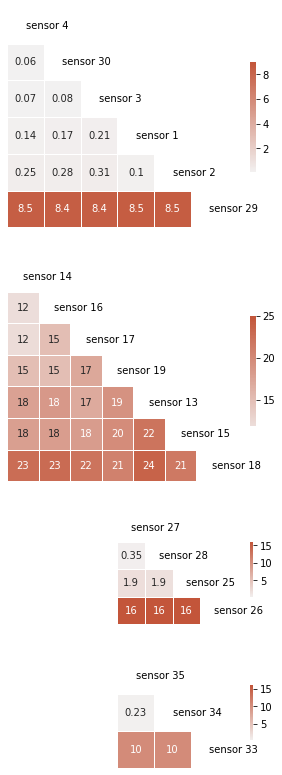

In [25]:
def plot_heatmap(ax,dtw_m,dtw_c,vmax,vmin,cluster):
    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(dtw_m, dtype=bool))

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(230, 20, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(dtw_m, mask=mask, cmap=cmap, vmax=vmax, center=vmin, ax=ax,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
    for i in range(len(dtw_m)):
        ax.text(i+0.5,(i+0.5), dtw_c[i],  
                ha="left", va="center")

#     ax.set_ylabel('DTW distances matrix heatmap')
    ax.axis("off")
#     ax.set_title('Cluster {} and DTW distances matrix'.format(cluster+1))
#     ax.set_ylabel('DTW distances matrix heatmap')

def plot_cluster_center(ax,train,center,order_true,cluster):
    norm = train/4
    for x in norm:
        ax.plot(x.ravel(), "k-", alpha=.2)
    ax.plot(norm[center[0]].ravel(), "r-")
    ax.set_ylim(-1, 1)
#     ax.set_xlabel('Time (days)')
    plt.sca(ax)
    plt.xticks(xticks,labels=xticks_label)
    plt.title('Cluster {} and centremost time series for sensor {}'.format(cluster+1,order_true[0]))

# Set up the matplotlib figure
f, ax = plt.subplots(4,1,figsize=(8, 14),gridspec_kw={'height_ratios': [2,2,1,1]})
v_max = [9,25,16,16]
v_min = [0,10,0,0]

xticks = np.arange(0,len(df_resampled)+1,6*24*5)
xticks_label = np.arange(0,31,5)

cl_to_plot = [0,1,2,3]
for i,cl in enumerate(cl_to_plot):
    
    cl_order_true = [(s_l[s_clustered[cl][k]]) for k in cl_order[cl].astype(int)]
    dtw_c = ['sensor '+str(k) for k in cl_order_true]
    #plotting heat map
    plot_heatmap(ax[i],cl_nm[cl],dtw_c,v_max[cl],v_min[cl],cl)

plt.tight_layout

path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp_heatmaps.png'
plt.savefig(path+file,dpi=1200)
plt.show();

# Binary classification analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from source.fitness_functions import FitnessFunctions,calculateBynaryClassification,calculateMultiClassError
from source.load_anomaly_dataset import LoadADdataset
from source.metrics import Metrics
from source._helpers import *


## Ploting input window performance over generations

In [2]:
def get_data(sensor,path_end=None):
    filename = 'experiments/aDetection_s{}_bin/score_results/s{}_{}_bin_results_evolution_set.csv'.format(sensor,sensor,path_end)
    
    print('Loading sensor {} in {}'.format(sensor,filename))
    df =  pd.read_csv(filename,index_col=0)
    df['acc+f1'] = df['accuracy']+df['macro f1-score']
    df['macro P+R'] =  df['macro precision'] + df['macro recall']
    return df


sensors_l = [4,14,27,35]
df_bin = pd.DataFrame({})
for i,s in enumerate(sensors_l):
    df_s = get_data(s,path_end='noNwAdj')
    df_s['cluster'] = i+1 
    df_bin = pd.concat([df_bin,df_s])
filter = df_bin['inputs'] >5
df_bin = df_bin[filter]
df_bin.reset_index(drop=True,inplace=True)
df_bin


Loading sensor 4 in experiments/aDetection_s4_bin/score_results/s4_noNwAdj_bin_results_evolution_set.csv
Loading sensor 14 in experiments/aDetection_s14_bin/score_results/s14_noNwAdj_bin_results_evolution_set.csv
Loading sensor 27 in experiments/aDetection_s27_bin/score_results/s27_noNwAdj_bin_results_evolution_set.csv
Loading sensor 35 in experiments/aDetection_s35_bin/score_results/s35_noNwAdj_bin_results_evolution_set.csv


,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,acc+f1,macro P+R,cluster
0,4,1,10,1,none,10,0.931132,0.860585,0.905034,0.861494,0.084001,0.915999,0.907007,0.871969,0.887384,1.803383,1.778976,1
1,4,1,10,1,none,20,0.950396,0.900051,0.931906,0.896570,0.067635,0.932365,0.921323,0.902138,0.911114,1.843479,1.823461,1
2,4,1,10,1,none,30,0.950396,0.900051,0.931906,0.896570,0.067635,0.932365,0.921323,0.902138,0.911114,1.843479,1.823461,1
3,4,1,10,1,none,40,0.950396,0.900051,0.931906,0.896570,0.067635,0.932365,0.921323,0.902138,0.911114,1.843479,1.823461,1
4,4,1,10,1,none,50,0.964318,0.948944,0.948014,0.926821,0.054860,0.945140,0.946065,0.911115,0.926731,1.871871,1.857179,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,35,5,30,1,softmax,360,0.682806,0.919848,0.646785,0.878998,0.259325,0.740675,0.753872,0.787472,0.735527,1.476202,1.541344,4
7196,35,5,30,1,softmax,370,0.682806,0.919848,0.646785,0.878998,0.259325,0.740675,0.753872,0.787472,0.735527,1.476202,1.541344,4
7197,35,5,30,1,softmax,380,0.889560,0.896163,0.818457,0.825107,0.310001,0.689999,0.633299,0.591477,0.592601,1.282600,1.224776,4
7198,35,5,30,1,softmax,390,0.889560,0.896163,0.818457,0.825107,0.310001,0.689999,0.633299,0.591477,0.592601,1.282600,1.224776,4


## Figures used in binary results paper

### Inputs and output filter performance

In [3]:
exp_l = [1,2,3,4,5]
filter_l = ['none','maxToOne','softmax']
inputs_l = [10,20,30]

df_best = pd.DataFrame({},columns=df_bin.columns)
s = 4
exp = 1
inputs = 10
nW = 1
filt = 'none'
df = df_bin
for s in sensors_l:
    for exp in exp_l:
        for inputs in inputs_l:
            for filt in filter_l:
                filter = (df['sensor']==s) & (df['exp']==exp) & (df['inputs']==inputs) & (df['normal_weight']==nW) & (df['filter']==filt)
                aux = df_bin[filter]
                idx = aux['hamming loss'].argmin()
                df_best = pd.concat([df_best,pd.DataFrame(aux.iloc[idx]).T])
df_best.reset_index(drop=True,inplace=True)
df_best

,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,acc+f1,macro P+R,cluster
0,4,1,10,1,none,110,0.972321,0.9542,0.959267,0.943421,0.028308,0.971692,0.973913,0.952987,0.962823,1.934515,1.926901,1
1,4,1,10,1,maxToOne,20,0.858358,0.735946,0.8076,0.721983,0.141642,0.858358,0.908811,0.735946,0.77594,1.634298,1.644757,1
2,4,1,10,1,softmax,300,0.99527,0.991444,0.994775,0.9919,0.010084,0.989916,0.988817,0.985211,0.986996,1.976911,1.974028,1
3,4,1,20,1,none,20,0.939468,0.898429,0.926661,0.895031,0.09647,0.90353,0.937901,0.819728,0.858543,1.762074,1.757629,1
4,4,1,20,1,maxToOne,110,0.946658,0.912487,0.922832,0.89217,0.053342,0.946658,0.94883,0.912487,0.928667,1.875325,1.861316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,35,5,20,1,maxToOne,50,0.904763,0.878186,0.820423,0.844942,0.041163,0.958837,0.971221,0.936869,0.951492,1.910329,1.90809,4
176,35,5,20,1,softmax,10,0.874019,0.83946,0.786393,0.824067,0.045,0.955,0.962117,0.935785,0.947366,1.902366,1.897902,4
177,35,5,30,1,none,40,0.869785,0.839443,0.768234,0.831904,0.040724,0.959276,0.966337,0.941384,0.952446,1.911722,1.907721,4
178,35,5,30,1,maxToOne,40,0.899497,0.876386,0.813163,0.833146,0.047574,0.952426,0.955708,0.935613,0.944696,1.897122,1.891321,4


In [4]:
(df_best.groupby(['cluster','inputs']).mean()*100).round(0)

/home/svladimir/anaconda3/envs/pytorch/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


sensor    exp  normal_weight      gen  ROC_micro  ROC_macro  \
cluster inputs                                                                
1       10       400.0  300.0          100.0   7333.0       95.0       90.0   
        20       400.0  300.0          100.0   9933.0       94.0       89.0   
        30       400.0  300.0          100.0  11067.0       92.0       89.0   
2       10      1400.0  300.0          100.0   6933.0       94.0       92.0   
        20      1400.0  300.0          100.0   8267.0       94.0       92.0   
        30      1400.0  300.0          100.0   7400.0       90.0       89.0   
3       10      2700.0  300.0          100.0  26667.0       89.0       91.0   
        20      2700.0  300.0          100.0  20333.0       89.0       89.0   
        30      2700.0  300.0          100.0  19800.0       89.0       88.0   
4       10      3500.0  300.0          100.0   2333.0       88.0       85.0   
        20      3500.0  300.0          100.0   5933.0       88.0       86.0   
        30      3500.0  300.0          100.0   4067.0       88.0       86.0   

                AP_micro  AP_macro  hamming loss  accuracy  macro precision  \
cluster inputs                                                                
1       10          93.0      90.0           7.0      93.0             95.0   
        20          92.0      88.0           8.0      92.0             95.0   
        30          90.0      88.0           7.0      93.0             95.0   
2       10          93.0      92.0           7.0      93.0             88.0   
        20          92.0      91.0           7.0      93.0             95.0   
        30          88.0      88.0           9.0      91.0             91.0   
3       10          86.0      88.0           9.0      91.0             92.0   
        20          86.0      87.0          10.0      90.0             92.0   
        30          87.0      87.0          10.0      90.0             92.0   
4       10          80.0      84.0           4.0      96.0             97.0   
        20          79.0      84.0           5.0      95.0             96.0   
        30          80.0      84.0           4.0      96.0             96.0   

                macro recall  macro f1-score  acc+f1  macro P+R  
cluster inputs                                                   
1       10              88.0            90.0   183.0      183.0  
        20              86.0            89.0   181.0      181.0  
        30              86.0            89.0   182.0      181.0  
2       10              87.0            87.0   180.0      176.0  
        20              87.0            89.0   182.0      182.0  
        30              83.0            86.0   177.0      175.0  
3       10              90.0            90.0   181.0      182.0  
        20              87.0            88.0   178.0      179.0  
        30              87.0            88.0   178.0      180.0  
4       10              94.0            95.0   192.0      191.0  
        20              93.0            94.0   190.0      189.0  
        30              94.0            95.0   190.0      190.0

In [5]:
# fig, ax = plt.subplots(3,2,figsize=(12, 9),sharey=True,sharex=False)
# in_l = [10,20,30]
# in_labels = [str(i) for i in in_l] 

# filter_l = ['none','maxToOne','softmax']
# filter_labels = [str(i) for i in filter_l] 

# in_x = np.arange(len(in_labels))  # the label locations

# width = 0.2  # the width of the bars

# metric_l = ['AP_macro','ROC_macro','hamming loss']
# label_met= ['AP score (%)','ROC AUC score (%)','Hamming loss']

# g_s = (df_best.groupby(['cluster','inputs']).mean()*100).round(0).copy()
# j=0
# for i,m in enumerate(metric_l):
#     for k in range(len(sensors_l)):
#         inp  = ax[i,j].bar(in_x +k*width-1.5*width, g_s.loc[k+1,m], width)
#         ax[i,j].bar_label(inp, padding=1)
#     ax[i,j].set_xticks(np.arange(len(in_labels)), in_labels)
#     ax[i,j].set_ylabel(label_met[i])
# ax[0,j].set_title('Input window performance evaluation')
# ax[2,j].set_xlabel('Input window size')

# g_s = (df_best.groupby(['cluster','filter']).mean()*100).round(0).copy()
# j=1
# for i,m in enumerate(metric_l):
#     for k in range(len(sensors_l)):
#         inp  = ax[i,j].bar(in_x +k*width-1.5*width, g_s.loc[k+1,m], width)
#         ax[i,j].bar_label(inp, padding=1)
#     ax[i,j].set_xticks(np.arange(len(filter_labels)), filter_labels)
# #     ax[i,j].set_ylabel(label_met[i])
# ax[0,j].set_title('Output filter performance evaluation')
# ax[2,j].set_xlabel('Filter type')

# plt.ylim((0,109))
# legend = ['Cluster 1','Cluster 2','Cluster 3','Cluster 4']
# fig.legend(legend,loc='lower center',ncol=4, fancybox=True,shadow=True)
# plt.show()

### Cluster AP, ROC and hamming loss analysis

In [5]:
l_cl = [1,2,3,4]
l_inputs = [20,20,20,10]
l_filter = ['softmax','none','none','none']
l_gen = [260,130,270,30]

df_best = pd.DataFrame({})
df = df_bin.copy()
for cl,inputs,filt,gen in zip(l_cl,l_inputs,l_filter,l_gen):
    filter = (df['cluster'] == cl) & (df['inputs'] == inputs) & (df['filter'] == filt)
    df_best = pd.concat([df_best,df[filter]])
    
df_best.reset_index(inplace=True,drop=True)
df_best


,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,acc+f1,macro P+R,cluster
0,4,1,20,1,softmax,10,0.965565,0.947598,0.947581,0.940938,0.092424,0.907576,0.942344,0.826263,0.864968,1.772543,1.768607,1
1,4,1,20,1,softmax,20,0.902734,0.842249,0.879945,0.840741,0.164344,0.835656,0.897345,0.692556,0.727497,1.563153,1.589901,1
2,4,1,20,1,softmax,30,0.603338,0.746387,0.589106,0.736291,0.154572,0.845428,0.840700,0.741081,0.770827,1.616255,1.581781,1
3,4,1,20,1,softmax,40,0.959215,0.934900,0.950851,0.908380,0.133439,0.866561,0.863978,0.778713,0.807709,1.674270,1.642691,1
4,4,1,20,1,softmax,50,0.926725,0.942414,0.922358,0.934438,0.195049,0.804951,0.867054,0.637059,0.657185,1.462136,1.504114,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,35,5,10,1,none,360,0.891273,0.881550,0.810779,0.872285,0.039561,0.960439,0.968371,0.942208,0.953751,1.914189,1.910579,4
796,35,5,10,1,none,370,0.891273,0.881550,0.810779,0.872285,0.039561,0.960439,0.968371,0.942208,0.953751,1.914189,1.910579,4
797,35,5,10,1,none,380,0.958511,0.951648,0.911728,0.925820,0.062013,0.937987,0.933570,0.924279,0.928692,1.866680,1.857849,4
798,35,5,10,1,none,390,0.958511,0.951648,0.911728,0.925820,0.062013,0.937987,0.933570,0.924279,0.928692,1.866680,1.857849,4


Best ECCDs models for binary classification


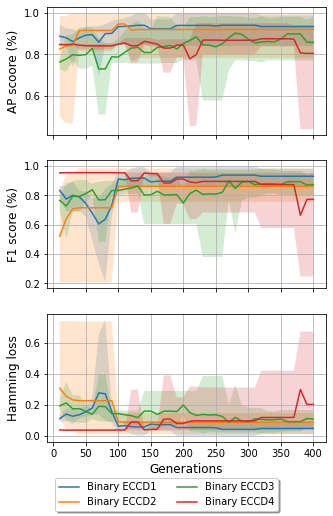

In [6]:
def plot_avg(ax,to_plot,column):
    to_plot.set_index('gen',inplace=True,drop=True)
    acc = to_plot.loc[:,column]

    acc_avg = acc.groupby('gen').mean()
    x= acc_avg.index.values
    acc_min = acc.groupby('gen').min()
    acc_max = acc.groupby('gen').max()
    ax.plot(acc_avg)
    ax.fill_between(x,acc_min,acc_max, alpha=0.2,label='_nolegend_')
    

legend = ['Binary ECCD'+str(i) for i in range(1,5)]

metric_l = ['AP_macro','macro f1-score','hamming loss']
y_labels = ['AP scoore (%)', 'F1 score (%)','Hamming loss']

fig, ax = plt.subplots(3,1,figsize=(5,8),sharex=True)
print('Best ECCDs models for binary classification')
for i,m in enumerate(metric_l):
    for cl in l_cl:
        filter = df_best['cluster'] == cl
        to_plot = df_best[filter]
        plot_avg(ax[i],to_plot,m)

        ax[-1].set_xlabel('Generations', fontsize=12)
        ax[i].grid(True)
    ax[i].set_ylabel(y_labels[i], fontsize=12)
    
fig.legend(legend,loc='lower center',ncol=2, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp2c4_bin1.png'
plt.savefig(path+file,dpi=300)
plt.show()

In [7]:
#Table best results
cols = ['sensor','inputs','gen','AP_macro','macro f1-score','hamming loss']
df_table = pd.DataFrame({})
df = df_best.copy()
for cl,gen in zip(l_cl,l_gen):
    filter = (df['cluster'] == cl) & (df['gen'] == gen)
    df_table = pd.concat([df_table,df[filter]])

df_table = df_table.reindex(columns=['cluster']+cols)
df_table.iloc[:,4:] *=100
df_table.reset_index(inplace=True,drop=True)

table = df_table.groupby('cluster').mean()
table.loc[:,cols].round(2)

,sensor,inputs,gen,AP_macro,macro f1-score,hamming loss
cluster,,,,,,
1,4.0,20.0,260.0,93.96,93.86,4.31
2,14.0,20.0,130.0,91.92,86.25,8.89
3,27.0,20.0,270.0,87.97,89.91,8.90
4,35.0,10.0,30.0,84.93,95.53,3.82


In [9]:
# from matplotlib.pyplot import figure
# figure(figsize=(5,3))
# sns.set_theme(style="whitegrid")
# sns.boxplot(x='cluster', y='AP_macro', data=df_table, color="b",width=0.4)
# plt.ylim(0,105)

# plt.xlabel('Clusters')
# plt.ylabel('AP score (%)')

Cluster AP, ROC and Hamming comparision


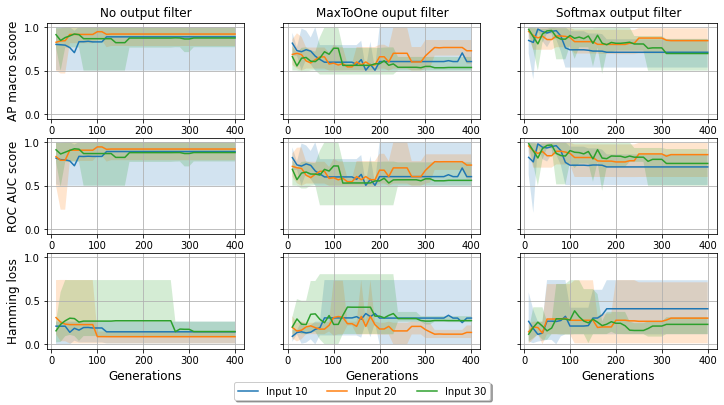

In [5]:
def plot_avg(ax,to_plot,column):
    to_plot.set_index('gen',inplace=True,drop=True)
    acc = to_plot.loc[:,column]

    acc_avg = acc.groupby('gen').mean()
    x= acc_avg.index.values
    acc_min = acc.groupby('gen').min()
    acc_max = acc.groupby('gen').max()
    ax.plot(acc_avg)
    ax.fill_between(x,acc_min,acc_max, alpha=0.2,label='_nolegend_')
    
input_l = [10,20,30]
filter_l = ['none','maxToOne','softmax']
title_l = ['No output filter','MaxToOne ouput filter','Softmax output filter']
legend = ['Input '+str(i) for i in input_l]

metric_l = ['AP_macro','ROC_macro','hamming loss']
y_labels = ['AP macro scoore', 'ROC AUC score','Hamming loss']
s = 14

fig, ax = plt.subplots(3,3,figsize=(12,6),sharey=True)
print('Cluster AP, ROC and Hamming comparision')
for i,m in enumerate(metric_l):
    filter = (df_bin['sensor'] == s) & (df_bin['normal_weight'] == 1)
    df = df_bin[filter]
    for j,fil in enumerate(filter_l):
        filter = df['filter'] == fil
        s_plot = df[filter]
        for inputs in input_l:
            filter = s_plot['inputs'] == inputs
            to_plot = s_plot[filter]
            plot_avg(ax[i,j],to_plot,m)

            ax[0,j].set_title(title_l[j])
            ax[-1,j].set_xlabel('Generations', fontsize=12)
            ax[i,j].grid(True)
    ax[i,0].set_ylabel(y_labels[i], fontsize=12)
    
fig.legend(legend,loc='lower center',ncol=3, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp4_bin1.png'
plt.savefig(path+file,dpi=600)
plt.show()

### Hamming loss for model selection

Hamming loss for each cluster


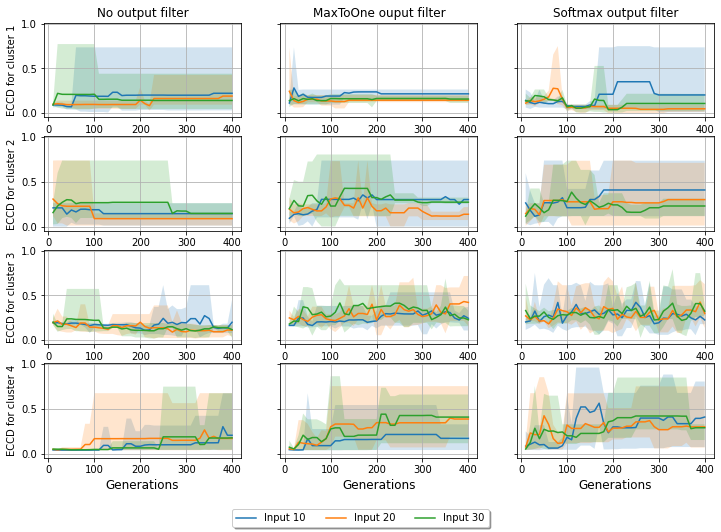

In [6]:
input_l = [10,20,30]
filter_l = ['none','maxToOne','softmax']
legend = ['Input '+str(i) for i in input_l]

metric = 'hamming loss'

fig, ax = plt.subplots(4,3,figsize=(12,8),sharey=True)
print('Hamming loss for each cluster')
for i,s in enumerate(sensors_l):
    filter = (df_bin['sensor'] == s) & (df_bin['normal_weight'] == 1)
    df = df_bin[filter]
    for j,fil in enumerate(filter_l):
        filter = df['filter'] == fil
        s_plot = df[filter]
        for inputs in input_l:
            filter = s_plot['inputs'] == inputs
            to_plot = s_plot[filter]
            plot_avg(ax[i,j],to_plot,metric)

            ax[0,j].set_title(title_l[j])
            ax[3,j].set_xlabel('Generations', fontsize=12)
            ax[i,j].grid(True)
    ax[i,0].set_ylabel('ECCD for cluster {}'.format(i+1), fontsize=10)
    
fig.legend(legend,loc='lower center',ncol=3, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp5_bin2.png'
plt.savefig(path+file,dpi=600)
plt.show()

# Multi label results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from source.fitness_functions import FitnessFunctions,calculateBynaryClassification,calculateMultiClassError
from source.load_anomaly_dataset import LoadADdataset
from source.metrics import Metrics
from source._helpers import *


## Ploting input performance over generations

In [2]:
def get_data(sensor,path_end='filter'):
    filename = 'experiments/aDetection_s{}_{}/score_results/s{}_noNwAdj_results_evolution_set.csv'.format(sensor,path_end,sensor,path_end)
    print('Loading sensor {} in {}'.format(sensor,filename))
    df =  pd.read_csv(filename,index_col=0)
    df['acc+f1'] = df['accuracy']+df['macro f1-score']
    df['macro P+R'] =  df['macro precision'] + df['macro recall']
    return df

def plot_avg(ax,to_plot,column):
    to_plot.set_index('gen',inplace=True,drop=True)
    acc = to_plot.loc[:,column]

    acc_avg = acc.groupby('gen').mean()
    x= acc_avg.index.values
    acc_min = acc.groupby('gen').min()
    acc_max = acc.groupby('gen').max()
    ax.plot(acc_avg)
    ax.fill_between(x,acc_min,acc_max, alpha=0.2,label='_nolegend_')
    
sensors_l = [4,14,27,35]
df_mul = pd.DataFrame({})
for i,s in enumerate(sensors_l):
    df_s = get_data(s,path_end='filter')
    df_s['cluster'] = i+1 
    df_mul = pd.concat([df_mul,df_s])
df_mul.reset_index(drop=True, inplace=True)
df_mul

Loading sensor 4 in experiments/aDetection_s4_filter/score_results/s4_noNwAdj_results_evolution_set.csv
Loading sensor 14 in experiments/aDetection_s14_filter/score_results/s14_noNwAdj_results_evolution_set.csv
Loading sensor 27 in experiments/aDetection_s27_filter/score_results/s27_noNwAdj_results_evolution_set.csv
Loading sensor 35 in experiments/aDetection_s35_filter/score_results/s35_noNwAdj_results_evolution_set.csv


,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,micro,macro precision,macro recall,macro f1-score,acc+f1,macro P+R,cluster
0,4,1,10,1,none,10,0.959819,0.786287,0.817700,0.697043,0.127987,0.872013,0.872013,0.409279,0.492716,0.446251,1.318265,0.901994,1
1,4,1,10,1,none,20,0.908229,0.737019,0.752689,0.630121,0.177734,0.822266,0.822266,0.393001,0.396471,0.388988,1.211255,0.789472,1
2,4,1,10,1,none,30,0.592745,0.735198,0.326944,0.493147,0.865801,0.134199,0.134199,0.051567,0.251674,0.064332,0.198531,0.303241,1
3,4,1,10,1,none,40,0.592745,0.735198,0.326944,0.493147,0.865801,0.134199,0.134199,0.051567,0.251674,0.064332,0.198531,0.303241,1
4,4,1,10,1,none,50,0.956960,0.836478,0.854627,0.707179,0.085052,0.914948,0.914948,0.698086,0.737651,0.716427,1.631375,1.435737,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,35,5,30,1,softmax,360,0.994631,0.991392,0.985506,0.958866,0.015108,0.984892,0.984892,0.982108,0.983854,0.982966,1.967857,1.965962,4
7196,35,5,30,1,softmax,370,0.994631,0.991392,0.985506,0.958866,0.015108,0.984892,0.984892,0.982108,0.983854,0.982966,1.967857,1.965962,4
7197,35,5,30,1,softmax,380,0.994631,0.991392,0.985506,0.958866,0.015108,0.984892,0.984892,0.982108,0.983854,0.982966,1.967857,1.965962,4
7198,35,5,30,1,softmax,390,0.994631,0.991392,0.985506,0.958866,0.015108,0.984892,0.984892,0.982108,0.983854,0.982966,1.967857,1.965962,4


In [3]:
l_cl = [1,2,3,4]
l_inputs = [20,10,10,10]
l_filter = ['none','softmax','none','none']
l_gen = [200,70,340,210]

cl = 1
inputs =20
filt = 'none'
gen = 200

df_table = pd.DataFrame({})
df = df_mul.copy()
for cl,inputs,filt,gen in zip(l_cl,l_inputs,l_filter,l_gen):
    filter = (df['cluster'] == cl) & (df['inputs'] == inputs) & (df['filter'] == filt) & (df['gen'] == gen)
    df_table = pd.concat([df_table,df[filter]])
    
(df_table.groupby('cluster').mean()*100).round(2)

,sensor,exp,inputs,normal_weight,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,micro,macro precision,macro recall,macro f1-score,acc+f1,macro P+R
cluster,,,,,,,,,,,,,,,,,
1,400.0,300.0,2000.0,100.0,20000.0,98.39,94.97,95.61,92.55,3.90,96.10,96.10,87.91,87.54,87.65,183.75,175.45
2,1400.0,300.0,1000.0,100.0,7000.0,99.69,99.67,99.43,99.45,1.40,98.60,98.60,98.10,98.94,98.40,197.00,197.04
3,2700.0,300.0,1000.0,100.0,34000.0,99.34,97.36,98.57,91.46,2.41,97.59,97.59,98.90,85.57,88.13,185.73,184.47
4,3500.0,300.0,1000.0,100.0,21000.0,99.74,99.69,99.36,99.03,0.71,99.29,99.29,99.25,98.76,98.99,198.28,198.01


## One column presentation

In [4]:
l_cl = [1,2,3,4]
l_inputs = [20,10,10,10]
l_filter = ['none','softmax','none','none']
l_gen = [200,70,340,210]

df_best = pd.DataFrame({})
df = df_mul.copy()
for cl,inputs,filt,gen in zip(l_cl,l_inputs,l_filter,l_gen):
    filter = (df['cluster'] == cl) & (df['inputs'] == inputs) & (df['filter'] == filt)
    df_best = pd.concat([df_best,df[filter]])
    
df_best.reset_index(inplace=True,drop=True)
df_best


,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,micro,macro precision,macro recall,macro f1-score,acc+f1,macro P+R,cluster
0,4,1,20,1,none,10,0.917491,0.775285,0.874939,0.704796,0.135390,0.864610,0.864610,0.453775,0.481997,0.466402,1.331013,0.935773,1
1,4,1,20,1,none,20,0.936488,0.813172,0.842342,0.690579,0.175994,0.824006,0.824006,0.377996,0.398608,0.386371,1.210377,0.776604,1
2,4,1,20,1,none,30,0.937526,0.805445,0.867105,0.732127,0.086732,0.913268,0.913268,0.724019,0.727966,0.725032,1.638299,1.451985,1
3,4,1,20,1,none,40,0.938566,0.808189,0.861181,0.719435,0.086608,0.913392,0.913392,0.705046,0.736235,0.719593,1.632985,1.441280,1
4,4,1,20,1,none,50,0.955006,0.814339,0.897376,0.716784,0.083720,0.916280,0.916280,0.719910,0.736646,0.727582,1.643862,1.456556,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,35,5,10,1,none,360,0.999979,0.999926,0.999932,0.999831,0.000220,0.999780,0.999780,0.999901,0.999248,0.999574,1.999354,1.999149,4
796,35,5,10,1,none,370,0.999979,0.999926,0.999932,0.999831,0.000220,0.999780,0.999780,0.999901,0.999248,0.999574,1.999354,1.999149,4
797,35,5,10,1,none,380,0.999979,0.999926,0.999932,0.999831,0.000220,0.999780,0.999780,0.999901,0.999248,0.999574,1.999354,1.999149,4
798,35,5,10,1,none,390,0.999979,0.999926,0.999932,0.999831,0.000220,0.999780,0.999780,0.999901,0.999248,0.999574,1.999354,1.999149,4


Best ECCDs models for binary classification


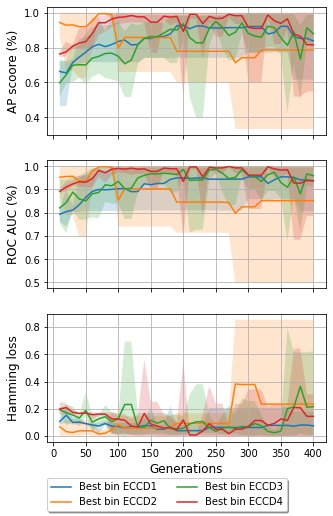

In [5]:
def plot_avg(ax,to_plot,column):
    to_plot.set_index('gen',inplace=True,drop=True)
    acc = to_plot.loc[:,column]

    acc_avg = acc.groupby('gen').mean()
    x= acc_avg.index.values
    acc_min = acc.groupby('gen').min()
    acc_max = acc.groupby('gen').max()
    ax.plot(acc_avg)
    ax.fill_between(x,acc_min,acc_max, alpha=0.2,label='_nolegend_')
    

legend = ['Best bin ECCD1','Best bin ECCD2','Best bin ECCD3','Best bin ECCD4']
metric_l = ['AP_macro','ROC_macro','hamming loss']
y_labels = ['AP scoore (%)', 'ROC AUC (%)','Hamming loss']


fig, ax = plt.subplots(3,1,figsize=(5,8),sharex=True)
print('Best ECCDs models for binary classification')
for i,m in enumerate(metric_l):
    for cl in l_cl:
        filter = df_best['cluster'] == cl
        to_plot = df_best[filter]
        plot_avg(ax[i],to_plot,m)

        ax[-1].set_xlabel('Generations', fontsize=12)
        ax[i].grid(True)
    ax[i].set_ylabel(y_labels[i], fontsize=12)
    
fig.legend(legend,loc='lower center',ncol=2, fancybox=True,shadow=True)
plt.tight_layout
# path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
# file = 'exp4_bin1.png'
# plt.savefig(path+file,dpi=600)
plt.show()

In [10]:
#Table best results
cols = ['inputs','gen','AP_macro','hamming loss','macro f1-score']
df_table = pd.DataFrame({})
df = df_best.copy()
for cl,gen in zip(l_cl,l_gen):
    filter = (df['cluster'] == cl) & (df['gen'] == gen)
    df_table = pd.concat([df_table,df[filter]])

df_table = df_table.reindex(columns=['cluster']+cols)
df_table.iloc[:,3:] *=100
df_table.reset_index(inplace=True,drop=True)

table = df_table.groupby('cluster').mean()
table.loc[:,cols].round(2)

,inputs,gen,AP_macro,hamming loss,macro f1-score
cluster,,,,,
1,20.0,200.0,92.55,3.90,87.65
2,10.0,70.0,99.45,1.40,98.40
3,10.0,340.0,91.46,2.41,88.13
4,10.0,210.0,99.03,0.71,98.99


In [11]:
# from matplotlib.pyplot import figure
# figure(figsize=(5,3))
# sns.set_theme(style="whitegrid")
# sns.boxplot(x='cluster', y='AP_macro', data=df_table, color="b",width=0.4)
# plt.ylim(0,105)

# plt.xlabel('Clusters')
# plt.ylabel('AP score (%)')

## Figures used in Multi label results paper

### Hamming loss for model selection

Hamming loss for each cluster


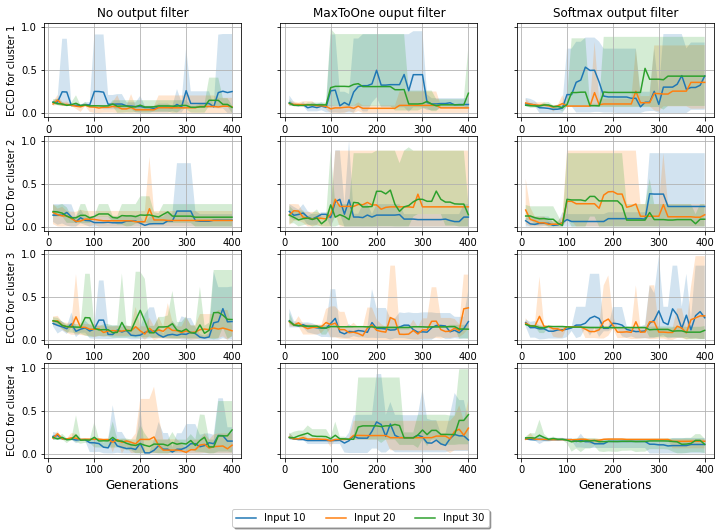

In [9]:
input_l = [10,20,30]
filter_l = ['none','maxToOne','softmax']
legend = ['Input '+str(i) for i in input_l]
title_l = ['No output filter','MaxToOne ouput filter','Softmax output filter']

metric = 'hamming loss'

fig, ax = plt.subplots(4,3,figsize=(12,8),sharey=True)
print('Hamming loss for each cluster')
for i,s in enumerate(sensors_l):
    filter = (df_mul['sensor'] == s) & (df_mul['normal_weight'] == 1)
    df = df_mul[filter]
    for j,fil in enumerate(filter_l):
        filter = df['filter'] == fil
        s_plot = df[filter]
        for inputs in input_l:
            filter = s_plot['inputs'] == inputs
            to_plot = s_plot[filter]
            plot_avg(ax[i,j],to_plot,metric)

            ax[0,j].set_title(title_l[j])
            ax[3,j].set_xlabel('Generations', fontsize=12)
            ax[i,j].grid(True)
    ax[i,0].set_ylabel('ECCD for cluster {}'.format(i+1), fontsize=10)
    
fig.legend(legend,loc='lower center',ncol=3, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp6_multi1.png'
plt.savefig(path+file,dpi=600)

plt.show()

# Multi label unbalanced class adjustement (UCA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from source.fitness_functions import FitnessFunctions,calculateBynaryClassification,calculateMultiClassError
from source.load_anomaly_dataset import LoadADdataset
from source.metrics import Metrics
from source._helpers import *


In [2]:
def get_data(sensor,path_end='filter'):
    filename = 'experiments/aDetection_s{}_{}/score_results/s{}_NwAdjusted_results_evolution_set.csv'.format(sensor,path_end,sensor,path_end)
    print('Loading sensor {} in {}'.format(sensor,filename))
    df =  pd.read_csv(filename,index_col=0)
    df['acc+f1'] = (df['accuracy']+df['macro f1-score'])/2
    df['macro P+R'] =  (df['macro precision'] + df['macro recall'])/2
    return df

def plot_avg(ax,to_plot,column):
    to_plot.set_index('gen',inplace=True,drop=True)
    acc = to_plot.loc[:,column]

    acc_avg = acc.groupby('gen').mean()
    x= acc_avg.index.values
    acc_min = acc.groupby('gen').min()
    acc_max = acc.groupby('gen').max()
    ax.plot(acc_avg)
    ax.fill_between(x,acc_min,acc_max, alpha=0.2,label='_nolegend_')

sensors_l = [4,14,27,35]
df_adj = pd.DataFrame({})
for i,s in enumerate(sensors_l):
    df_s = get_data(s,path_end='weightned')
    df_s['cluster'] = i+1 
    df_adj = pd.concat([df_adj,df_s])
df_adj.reset_index(drop=True, inplace=True)
df_adj

Loading sensor 4 in experiments/aDetection_s4_weightned/score_results/s4_NwAdjusted_results_evolution_set.csv
Loading sensor 14 in experiments/aDetection_s14_weightned/score_results/s14_NwAdjusted_results_evolution_set.csv
Loading sensor 27 in experiments/aDetection_s27_weightned/score_results/s27_NwAdjusted_results_evolution_set.csv
Loading sensor 35 in experiments/aDetection_s35_weightned/score_results/s35_NwAdjusted_results_evolution_set.csv


,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,micro,macro precision,macro recall,macro f1-score,acc+f1,macro P+R,cluster
0,4,1,20,0.1,none,10,0.927583,0.817726,0.792608,0.703850,0.212000,0.788000,0.788000,0.679280,0.706818,0.691053,0.739526,0.693049,1
1,4,1,20,0.1,none,20,0.854924,0.901556,0.596737,0.748565,0.180343,0.819657,0.819657,0.773476,0.819027,0.779381,0.799519,0.796251,1
2,4,1,20,0.1,none,30,0.883554,0.855702,0.617795,0.741802,0.083616,0.916384,0.916384,0.851386,0.744122,0.734374,0.825379,0.797754,1
3,4,1,20,0.1,none,40,0.883554,0.855702,0.617795,0.741802,0.083616,0.916384,0.916384,0.851386,0.744122,0.734374,0.825379,0.797754,1
4,4,1,20,0.1,none,50,0.807404,0.934451,0.553662,0.794056,0.671899,0.328101,0.328101,0.745434,0.749851,0.591431,0.459766,0.747642,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,35,5,10,1.0,softmax,360,0.976349,0.921937,0.932940,0.847351,0.117200,0.882800,0.882800,0.950647,0.811883,0.827085,0.854943,0.881265,4
7196,35,5,10,1.0,softmax,370,0.976349,0.921937,0.932940,0.847351,0.117200,0.882800,0.882800,0.950647,0.811883,0.827085,0.854943,0.881265,4
7197,35,5,10,1.0,softmax,380,0.976349,0.921937,0.932940,0.847351,0.117200,0.882800,0.882800,0.950647,0.811883,0.827085,0.854943,0.881265,4
7198,35,5,10,1.0,softmax,390,0.976349,0.921937,0.932940,0.847351,0.117200,0.882800,0.882800,0.950647,0.811883,0.827085,0.854943,0.881265,4


In [3]:
l_cl = [1,2,3,4]
l_inputs = [20,10,10,10]
l_filter = ['none','softmax','none','softmax']
l_nW = [0.1,1,0.1,0.5]
l_gen = [200,70,230,370]

df_table = pd.DataFrame({})
df = df_adj.copy()
for cl,inputs,filt,gen,nW in zip(l_cl,l_inputs,l_filter,l_gen,l_nW):
    filter = (df['cluster'] == cl) & (df['inputs'] == inputs) &\
    (df['filter'] == filt) & (df['gen'] == gen) & (df['normal_weight'] == nW)
    df_table = pd.concat([df_table,df[filter]])
    
(df_table.groupby('cluster').mean()*100).round(2)

,sensor,exp,inputs,normal_weight,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,micro,macro precision,macro recall,macro f1-score,acc+f1,macro P+R
cluster,,,,,,,,,,,,,,,,,
1,400.0,300.0,2000.0,10.0,20000.0,99.68,99.39,98.40,98.73,0.29,99.71,99.71,99.13,99.44,99.28,99.49,99.29
2,1400.0,300.0,1000.0,100.0,7000.0,99.69,99.67,99.43,99.45,1.40,98.60,98.60,98.10,98.94,98.40,98.50,98.52
3,2700.0,300.0,1000.0,10.0,23000.0,99.46,99.54,98.89,95.06,1.63,98.37,98.37,94.94,94.51,94.07,96.22,94.72
4,3500.0,300.0,1000.0,50.0,37000.0,99.80,99.78,99.51,99.11,0.36,99.64,99.64,99.10,99.67,99.38,99.51,99.39


## One column presentation

In [5]:
l_cl = [1,2,3,4]
l_inputs = [20,10,10,10]
l_filter = ['none','softmax','none','softmax']
l_nW = [0.1,1,0.1,0.5]
l_gen = [200,70,230,370]

df_best = pd.DataFrame({})
df = df_adj.copy()
for cl,inputs,filt,gen,nW in zip(l_cl,l_inputs,l_filter,l_gen,l_nW):
    filter = (df['cluster'] == cl) & (df['inputs'] == inputs) &\
    (df['filter'] == filt) & (df['gen'] == gen) & (df['normal_weight'] == nW)

    df_best = pd.concat([df_best,df[filter]])
    
df_best.reset_index(inplace=True,drop=True)
df_best


,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,micro,macro precision,macro recall,macro f1-score,acc+f1,macro P+R,cluster
0,4,1,20,0.1,none,200,0.995031,0.994299,0.979984,0.980519,0.007457,0.992543,0.992543,0.983259,0.992279,0.987615,0.990079,0.987769,1
1,4,2,20,0.1,none,200,0.995849,0.993825,0.978246,0.994946,0.000310,0.999690,0.999690,0.999335,0.998990,0.999162,0.999426,0.999162,1
2,4,3,20,0.1,none,200,0.998324,0.994418,0.990019,0.994668,0.001872,0.998128,0.998128,0.999371,0.991522,0.995406,0.996767,0.995447,1
3,4,4,20,0.1,none,200,0.997381,0.992966,0.984967,0.974898,0.003501,0.996499,0.996499,0.981444,0.994372,0.987523,0.992011,0.987908,1
4,4,5,20,0.1,none,200,0.997258,0.993933,0.986910,0.991355,0.001583,0.998417,0.998417,0.993073,0.995041,0.994050,0.996234,0.994057,1
5,14,1,10,1.0,softmax,70,0.996521,0.994597,0.993506,0.986608,0.014384,0.985616,0.985616,0.986186,0.977673,0.981841,0.983728,0.981929,2
6,14,2,10,1.0,softmax,70,0.999850,0.999868,0.999744,0.999707,0.000579,0.999421,0.999421,0.999804,0.999000,0.999401,0.999411,0.999402,2
7,14,3,10,1.0,softmax,70,0.990600,0.994701,0.983559,0.994509,0.045392,0.954608,0.954608,0.930007,0.982278,0.950430,0.952519,0.956143,2
8,14,4,10,1.0,softmax,70,0.999984,0.999997,0.999971,0.999983,0.000298,0.999702,0.999702,0.999883,0.999483,0.999683,0.999692,0.999683,2
9,14,5,10,1.0,softmax,70,0.997642,0.994277,0.994796,0.991564,0.009381,0.990619,0.990619,0.989198,0.988434,0.988779,0.989699,0.988816,2


Best ECCDs models for binary classification


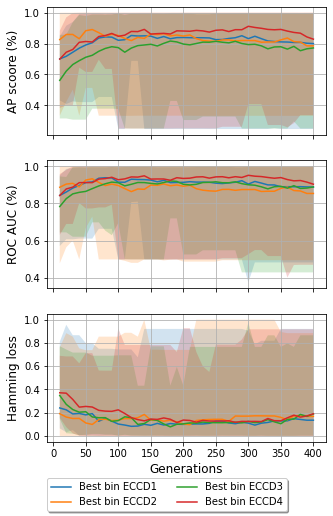

In [7]:
def plot_avg(ax,to_plot,column):
    to_plot.set_index('gen',inplace=True,drop=True)
    acc = to_plot.loc[:,column]

    acc_avg = acc.groupby('gen').mean()
    x= acc_avg.index.values
    acc_min = acc.groupby('gen').min()
    acc_max = acc.groupby('gen').max()
    ax.plot(acc_avg)
    ax.fill_between(x,acc_min,acc_max, alpha=0.2,label='_nolegend_')
    

legend = ['Best bin ECCD1','Best bin ECCD2','Best bin ECCD3','Best bin ECCD4']
metric_l = ['AP_macro','ROC_macro','hamming loss']
y_labels = ['AP scoore (%)', 'ROC AUC (%)','Hamming loss']


fig, ax = plt.subplots(3,1,figsize=(5,8),sharex=True)
print('Best ECCDs models for binary classification')
for i,m in enumerate(metric_l):
    for cl in l_cl:
        filter = df_adj['cluster'] == cl
        to_plot = df_adj[filter]
        plot_avg(ax[i],to_plot,m)

        ax[-1].set_xlabel('Generations', fontsize=12)
        ax[i].grid(True)
    ax[i].set_ylabel(y_labels[i], fontsize=12)
    
fig.legend(legend,loc='lower center',ncol=2, fancybox=True,shadow=True)
plt.tight_layout
# path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
# file = 'exp4_bin1.png'
# plt.savefig(path+file,dpi=600)
plt.show()

In [8]:
#Table best results
cols = ['inputs','gen','AP_macro','hamming loss','macro f1-score']
df_table = pd.DataFrame({})
df = df_best.copy()
for cl,gen in zip(l_cl,l_gen):
    filter = (df['cluster'] == cl) & (df['gen'] == gen)
    df_table = pd.concat([df_table,df[filter]])

df_table = df_table.reindex(columns=['cluster']+cols)
df_table.iloc[:,3:] *=100
df_table.reset_index(inplace=True,drop=True)

table = df_table.groupby('cluster').mean()
table.loc[:,cols].round(2)

,inputs,gen,AP_macro,hamming loss,macro f1-score
cluster,,,,,
1,20.0,200.0,98.73,0.29,99.28
2,10.0,70.0,99.45,1.40,98.40
3,10.0,230.0,95.06,1.63,94.07
4,10.0,370.0,99.11,0.36,99.38


In [11]:
# from matplotlib.pyplot import figure
# figure(figsize=(5,3))
# sns.set_theme(style="whitegrid")
# sns.boxplot(x='cluster', y='AP_macro', data=df_table, color="b",width=0.4)
# plt.ylim(0,105)

# plt.xlabel('Clusters')
# plt.ylabel('AP score (%)')

### Plotting Micro + macro f1-score

macro f1-scorefor each cluster


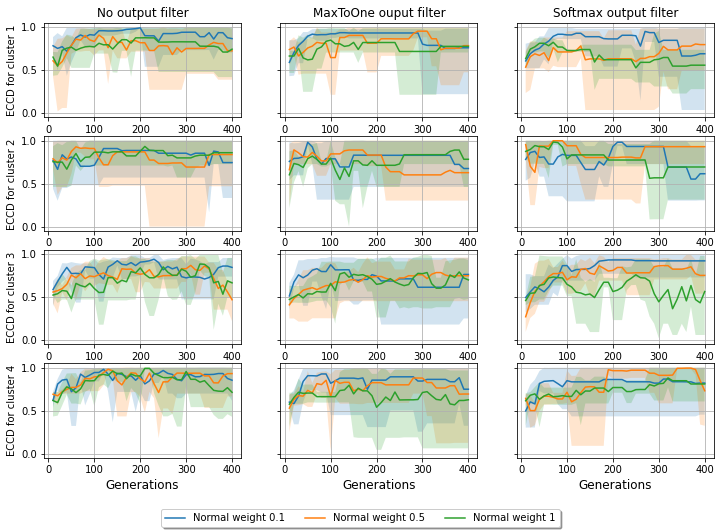

In [12]:
input_l = [20,10,10,10]
nW_l = [0.1,0.5,1]
filter_l = ['none','maxToOne','softmax']

legend = ['Normal weight '+str(i) for i in nW_l]
input_label = [str(i) for i in input_l]
title_l = ['No output filter','MaxToOne ouput filter','Softmax output filter']
metric = 'macro f1-score'

fig, ax = plt.subplots(4,3,figsize=(12,8),sharey=True)
print(metric+'for each cluster')
for i,s in enumerate(sensors_l):
    filter = (df_adj['sensor'] == s) & (df_adj['inputs'] == input_l[i])
    df = df_adj[filter]
    for j,fil in enumerate(filter_l):
        filter = df['filter'] == fil
        s_plot = df[filter]
        for nW in nW_l:
            filter = s_plot['normal_weight'] == nW
            to_plot = s_plot[filter]
            plot_avg(ax[i,j],to_plot,metric)

            ax[0,j].set_title(title_l[j])
            ax[3,j].set_xlabel('Generations', fontsize=12)
            ax[i,j].grid(True)
    ax[i,0].set_ylabel('ECCD for cluster {}'.format(i+1), fontsize=10)
    
fig.legend(legend,loc='lower center',ncol=3, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp7_multi_uca1.png'
plt.savefig(path+file,dpi=600)

plt.show()

# Real Set results

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def get_data(sensor,path_end='filter'):
    filename = 'experiments/aDetection_s{}_{}/score_results/s{}_cluster_general_scores.csv'.format(sensor,path_end,sensor,path_end)
    print('Loading sensor {} in {}'.format(sensor,filename))
    df =  pd.read_csv(filename,index_col=0)
#     df['acc+f1'] = (df['accuracy']+df['macro f1-score'])/2
    df['macro P+R'] =  (df['macro precision'] + df['macro recall'])/2
    return df

def plot_avg(ax,to_plot,column):
    to_plot.set_index('gen',inplace=True,drop=True)
    acc = to_plot.loc[:,column]

    acc_avg = acc.groupby('gen').mean()
    x= acc_avg.index.values
    acc_min = acc.groupby('gen').min()
    acc_max = acc.groupby('gen').max()
    ax.plot(acc_avg)
    ax.fill_between(x,acc_min,acc_max, alpha=0.2,label='_nolegend_')

sensors_l = [4,14,27,35]
df_all = pd.DataFrame({})
l_end_dir = ['bin','filter','weightned']
for end_dir in l_end_dir:
    for i,s in enumerate(sensors_l):
        df_s = get_data(s,path_end=end_dir)
        df_s['cluster'] = i+1
        df_s['detection_type'] = end_dir
        df_all = pd.concat([df_all,df_s])
    df_all.reset_index(drop=True, inplace=True)
df_all

Loading sensor 4 in experiments/aDetection_s4_bin/score_results/s4_cluster_general_scores.csv
Loading sensor 14 in experiments/aDetection_s14_bin/score_results/s14_cluster_general_scores.csv
Loading sensor 27 in experiments/aDetection_s27_bin/score_results/s27_cluster_general_scores.csv
Loading sensor 35 in experiments/aDetection_s35_bin/score_results/s35_cluster_general_scores.csv
Loading sensor 4 in experiments/aDetection_s4_filter/score_results/s4_cluster_general_scores.csv
Loading sensor 14 in experiments/aDetection_s14_filter/score_results/s14_cluster_general_scores.csv
Loading sensor 27 in experiments/aDetection_s27_filter/score_results/s27_cluster_general_scores.csv
Loading sensor 35 in experiments/aDetection_s35_filter/score_results/s35_cluster_general_scores.csv
Loading sensor 4 in experiments/aDetection_s4_weightned/score_results/s4_cluster_general_scores.csv
Loading sensor 14 in experiments/aDetection_s14_weightned/score_results/s14_cluster_general_scores.csv
Loading sensor 

,centremost,sensor,exp,inputs,normal_weight,filter,gen,ROC_micro,ROC_macro,AP_micro,AP_macro,hamming loss,accuracy,macro precision,macro recall,macro f1-score,macro P+R,cluster,detection_type,micro
0,4,1,1,20,1.0,softmax,260,0.966927,0.840254,0.951112,0.838728,3.566433e-02,0.964336,0.980210,0.840234,0.894947,0.910222,1,bin,NaN
1,4,1,2,20,1.0,softmax,260,0.988156,0.954233,0.983634,0.950875,1.152149e-02,0.988479,0.987254,0.954050,0.969880,0.970652,1,bin,NaN
2,4,1,3,20,1.0,softmax,260,0.993738,0.968824,0.993866,0.966758,9.495008e-03,0.990505,0.994714,0.957380,0.975084,0.976047,1,bin,NaN
3,4,1,4,20,1.0,softmax,260,0.930170,0.680549,0.868930,0.792827,3.613857e-02,0.963861,0.980458,0.837786,0.893224,0.909122,1,bin,NaN
4,4,1,5,20,1.0,softmax,260,0.997267,0.998956,0.997398,0.997480,1.909395e-03,0.998091,0.992264,0.998196,0.995206,0.995230,1,bin,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,35,35,1,10,0.5,softmax,370,0.999999,0.999989,0.999999,0.999966,7.824076e-05,0.999922,0.999977,0.997990,0.998980,0.998984,4,weightned,0.999922
296,35,35,2,10,0.5,softmax,370,0.961249,0.784351,0.904663,0.852936,3.419252e-02,0.965807,0.991009,0.862638,0.900731,0.926823,4,weightned,0.965807
297,35,35,3,10,0.5,softmax,370,1.000000,0.999995,1.000000,0.999990,6.172841e-06,0.999994,0.999997,0.999840,0.999919,0.999919,4,weightned,0.999994
298,35,35,4,10,0.5,softmax,370,0.955985,0.853138,0.882546,0.651582,3.476027e-02,0.965240,0.782606,0.860389,0.724113,0.821498,4,weightned,0.965240


In [3]:
df_all.groupby(['cluster','detection_type']).mean()

centremost  sensor  exp  inputs  normal_weight    gen  \
cluster detection_type                                                          
1       bin                    4.0    11.5  3.0    20.0            1.0  260.0   
        filter                 4.0    11.5  3.0    20.0            1.0  200.0   
        weightned              4.0    11.5  3.0    20.0            0.1  200.0   
2       bin                   14.0    16.0  3.0    20.0            1.0  130.0   
        filter                14.0    16.0  3.0    10.0            1.0   70.0   
        weightned             14.0    16.0  3.0    10.0            1.0   70.0   
3       bin                   27.0    26.5  3.0    20.0            1.0  270.0   
        filter                27.0    26.5  3.0    10.0            1.0  340.0   
        weightned             27.0    26.5  3.0    10.0            0.1  230.0   
4       bin                   35.0    34.0  3.0    10.0            1.0   30.0   
        filter                35.0    34.0  3.0    10.0            1.0  210.0   
        weightned             35.0    34.0  3.0    10.0            0.5  370.0   

                        ROC_micro  ROC_macro  AP_micro  AP_macro  \
cluster detection_type                                             
1       bin              0.946738   0.879385  0.936376  0.903369   
        filter           0.974243   0.898199  0.948832  0.748674   
        weightned        0.963167   0.934623  0.934897  0.904231   
2       bin              0.805858   0.786299  0.811598  0.805514   
        filter           0.935188   0.965946  0.911424  0.977310   
        weightned        0.934840   0.964925  0.911137  0.976985   
3       bin              0.937418   0.944915  0.932309  0.814680   
        filter           0.944535   0.942166  0.896874  0.819090   
        weightned        0.946703   0.959209  0.908716  0.879918   
4       bin              0.949460   0.689946  0.925577  0.807837   
        filter           0.988121   0.946426  0.982143  0.903978   
        weightned        0.982054   0.926582  0.953749  0.901492   

                        hamming loss  accuracy  macro precision  macro recall  \
cluster detection_type                                                          
1       bin                 0.049245  0.950755         0.971320      0.898550   
        filter              0.040941  0.959059         0.840906      0.793328   
        weightned           0.028641  0.971359         0.952625      0.921124   
2       bin                 0.248956  0.751044         0.852996      0.690705   
        filter              0.187873  0.812127         0.779951      0.895359   
        weightned           0.187873  0.812127         0.768353      0.860482   
3       bin                 0.158815  0.841185         0.731340      0.910958   
        filter              0.168447  0.831553         0.738700      0.766504   
        weightned           0.153303  0.846697         0.731744      0.795323   
4       bin                 0.045059  0.954941         0.976586      0.728751   
        filter              0.021740  0.978260         0.954684      0.908291   
        weightned           0.021358  0.978642         0.941605      0.941547   

                        macro f1-score  macro P+R     micro  
cluster detection_type                                       
1       bin                   0.914677   0.934935       NaN  
        filter                0.761844   0.817117  0.959059  
        weightned             0.915968   0.936875  0.971359  
2       bin                   0.622335   0.771850       NaN  
        filter                0.787990   0.837655  0.812127  
        weightned             0.774888   0.814418  0.812127  
3       bin                   0.753841   0.821149       NaN  
        filter                0.667033   0.752602  0.831553  
        weightned             0.648638   0.763534  0.846697  
4       bin                   0.801703   0.852668       NaN  
        filter                0.902486   0.931488  0.9782

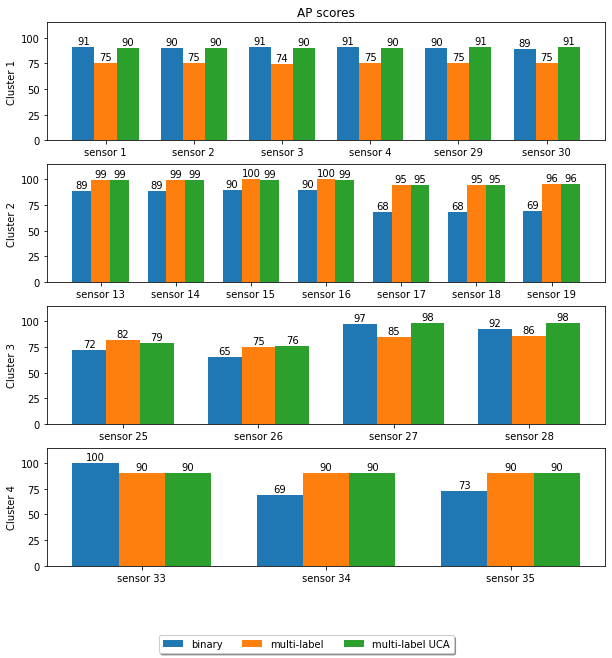

In [8]:
fig, ax = plt.subplots(4,1,figsize=(10, 10),sharey=True,sharex=False)

l_detection = ['bin','filter','weightned']
l_legend = ['binary', 'multi-label','multi-label UCA']
# filter_labels = [str(i) for i in filter_l] 

in_x = np.arange(len(l_detection))

width = 0.25  # the width of the bars

metric_l = ['AP_macro','ROC_macro','hamming loss']
label_met= ['AP score (%)','ROC AUC score (%)','Hamming loss']

df_g = (df_all.groupby(['cluster','sensor','detection_type']).mean()*100).round(0).copy()
idx = df_g.index.to_frame().reset_index(drop=True)

m = 'AP_macro'

for i,cl in enumerate(idx['cluster'].unique()):
    filter = idx['cluster'] == cl
    l_sensors = idx[filter]['sensor'].unique()
    in_x = np.arange(len(l_sensors))
    for k,det in enumerate(l_detection):
        inp  = ax[i].bar(in_x +k*width-1*width, df_g.loc[cl,:,det][m], width)
        ax[i].bar_label(inp, padding=1)
        label_sensors = ['sensor {}'.format(s) for s in l_sensors]
        ax[i].set_xticks(in_x, label_sensors)
        ax[i].set_ylabel('Cluster {}'.format(cl))
        ax[0].set_title('AP scores')
        

plt.ylim((0,115))
fig.legend(l_legend,loc='lower center',ncol=4, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp8_real1.png'
plt.savefig(path+file,dpi=400)
plt.show()

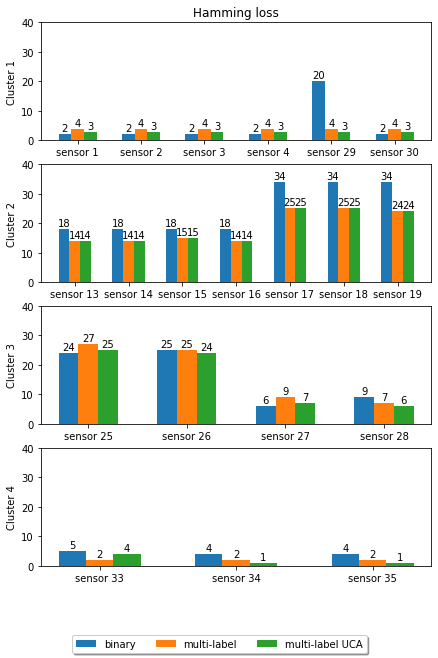

In [5]:
fig, ax = plt.subplots(4,1,figsize=(7, 10),sharey=True,sharex=False)

l_detection = ['bin','filter','weightned']
l_legend = ['binary', 'multi-label','multi-label UCA']
# filter_labels = [str(i) for i in filter_l] 

in_x = np.arange(len(l_detection))

width = 0.2  # the width of the bars

metric_l = ['AP_macro','ROC_macro','hamming loss']
label_met= ['AP score (%)','ROC AUC score (%)','Hamming loss']

df_g = (df_all.groupby(['cluster','sensor','detection_type']).mean()*100).round(0).copy()
idx = df_g.index.to_frame().reset_index(drop=True)

        
m = 'hamming loss'
j=1
for i,cl in enumerate(idx['cluster'].unique()):
    filter = idx['cluster'] == cl
    l_sensors = idx[filter]['sensor'].unique()
    in_x = np.arange(len(l_sensors))
    for k,det in enumerate(l_detection):
        inp  = ax[i].bar(in_x +k*width-1*width, df_g.loc[cl,:,det][m], width)
        ax[i].bar_label(inp, padding=1)
        label_sensors = ['sensor {}'.format(s) for s in l_sensors]
        ax[i].set_xticks(in_x, label_sensors)
        ax[i].set_ylabel('Cluster {}'.format(cl))
        ax[0].set_title('Hamming loss')

plt.ylim((0,40))
fig.legend(l_legend,loc='lower center',ncol=4, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp9_real2.png'
plt.savefig(path+file,dpi=400)
plt.show()

In [5]:
df_all.groupby(['detection_type','cluster']).mean()

centremost  sensor  exp  inputs  normal_weight    gen  \
detection_type cluster                                                          
bin            1               4.0    11.5  3.0    20.0            1.0  260.0   
               2              14.0    16.0  3.0    20.0            1.0  130.0   
               3              27.0    26.5  3.0    20.0            1.0  270.0   
               4              35.0    34.0  3.0    10.0            1.0   30.0   
filter         1               4.0    11.5  3.0    20.0            1.0  200.0   
               2              14.0    16.0  3.0    10.0            1.0   70.0   
               3              27.0    26.5  3.0    10.0            1.0  340.0   
               4              35.0    34.0  3.0    10.0            1.0  210.0   
weightned      1               4.0    11.5  3.0    20.0            0.1  200.0   
               2              14.0    16.0  3.0    10.0            1.0   70.0   
               3              27.0    26.5  3.0    10.0            0.1  230.0   
               4              35.0    34.0  3.0    10.0            0.5  370.0   

                        ROC_micro  ROC_macro  AP_micro  AP_macro  \
detection_type cluster                                             
bin            1         0.946738   0.879385  0.936376  0.903369   
               2         0.805858   0.786299  0.811598  0.805514   
               3         0.937418   0.944915  0.932309  0.814680   
               4         0.949460   0.689946  0.925577  0.807837   
filter         1         0.974243   0.898199  0.948832  0.748674   
               2         0.935188   0.965946  0.911424  0.977310   
               3         0.944535   0.942166  0.896874  0.819090   
               4         0.988121   0.946426  0.982143  0.903978   
weightned      1         0.963167   0.934623  0.934897  0.904231   
               2         0.934840   0.964925  0.911137  0.976985   
               3         0.946703   0.959209  0.908716  0.879918   
               4         0.982054   0.926582  0.953749  0.901492   

                        hamming loss  accuracy  macro precision  macro recall  \
detection_type cluster                                                          
bin            1            0.049245  0.950755         0.971320      0.898550   
               2            0.248956  0.751044         0.852996      0.690705   
               3            0.158815  0.841185         0.731340      0.910958   
               4            0.045059  0.954941         0.976586      0.728751   
filter         1            0.040941  0.959059         0.840906      0.793328   
               2            0.187873  0.812127         0.779951      0.895359   
               3            0.168447  0.831553         0.738700      0.766504   
               4            0.021740  0.978260         0.954684      0.908291   
weightned      1            0.028641  0.971359         0.952625      0.921124   
               2            0.187873  0.812127         0.768353      0.860482   
               3            0.153303  0.846697         0.731744      0.795323   
               4            0.021358  0.978642         0.941605      0.941547   

                        macro f1-score  macro P+R     micro  
detection_type cluster                                       
bin            1              0.914677   0.934935       NaN  
               2              0.622335   0.771850       NaN  
               3              0.753841   0.821149       NaN  
               4              0.801703   0.852668       NaN  
filter         1              0.761844   0.817117  0.959059  
               2              0.787990   0.837655  0.812127  
               3              0.667033   0.752602  0.831553  
               4              0.902486   0.931488  0.978260  
weightned      1              0.915968   0.936875  0.971359  
               2              0.774888   0.814418  0.812127  
               3              0.648638   0.763534  0.8466

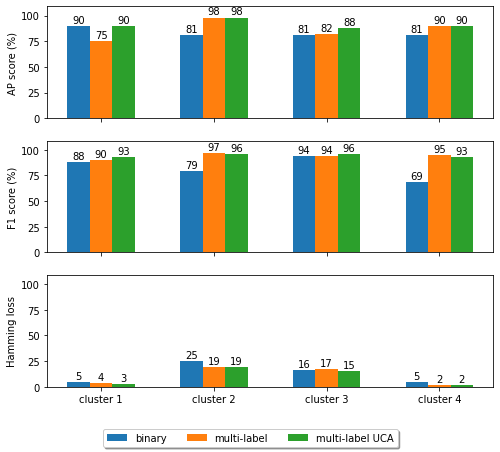

In [9]:
fig, ax = plt.subplots(3,1,figsize=(8, 7),sharey=True,sharex=True)

l_detection = ['bin','filter','weightned']
l_legend = ['binary', 'multi-label','multi-label UCA']
# filter_labels = [str(i) for i in filter_l] 

in_x = np.arange(len(l_detection))

width = 0.2  # the width of the bars

metric_l = ['AP_macro','macro f1-score','hamming loss']
label_metrics= ['AP score (%)','F1 score (%)','Hamming loss']

df_g = (df_all.groupby(['detection_type','cluster']).mean()*100).round(0).copy()
idx = df_g.index.to_frame().reset_index(drop=True)

l_metrics = ['AP_macro','ROC_macro','hamming loss']
metrics_label= ['AP score (%)','ROC AUC score (%)','Hamming loss']

l_clusters = [1,2,3,4]
clusters_label = ['cluster {}'.format(cl) for cl in l_clusters]

for i,m in enumerate(l_metrics):
    in_x = np.arange(len(l_clusters))
    for k,det in enumerate(l_detection):
        inp  = ax[i].bar(in_x +k*width-1*width, df_g.loc[det,:][m], width)
        ax[i].bar_label(inp, padding=1)
        ax[i].set_xticks(in_x, clusters_label)
        ax[i].set_ylabel(label_metrics[i])

plt.ylim((0,109))
fig.legend(l_legend,loc='lower center',ncol=4, fancybox=True,shadow=True)
plt.tight_layout
path = '/home/svladimir/DNN-CAE/experiments/paper_figures/'
file = 'exp2c10_real3.png'
plt.savefig(path+file,dpi=400)
plt.show()

## Result table

In [9]:
l_detection = ['bin','filter','weightned']
l_metrics = ['AP_macro','macro f1-score','hamming loss']
df_table = pd.DataFrame({})
for det in l_detection:
    filter = df_all['detection_type'] == det
    df_det = df_all[filter]
    aux = df_det.groupby(['cluster','sensor']).mean()
    df_table = pd.concat([df_table,(aux.loc[:,l_metrics]*100).round(2)],axis=1)

df_table

AP_macro  macro f1-score  hamming loss  AP_macro  \
cluster sensor                                                     
1       1          90.93           94.57          1.89     74.63   
        2          89.71           94.15          2.13     74.93   
        3          91.07           94.98          1.66     74.22   
        4          91.03           94.46          2.00     74.96   
        29         90.00           76.50         19.63     75.13   
        30         89.27           94.15          2.22     75.34   
2       13         89.50           76.00         18.38     99.49   
        14         89.28           76.18         18.40     99.47   
        15         89.85           75.77         18.25     99.52   
        16         90.10           75.69         18.23     99.52   
        17         68.22           44.21         33.69     95.21   
        18         68.21           43.24         33.62     95.15   
        19         68.71           44.54         33.70     95.76   
3       25         71.77           65.73         23.72     81.59   
        26         65.34           64.44         24.98     74.67   
        27         97.16           87.75          5.90     85.22   
        28         91.60           83.62          8.92     86.16   
4       33        100.00           78.32          5.16     90.36   
        34         69.45           81.14          4.16     90.36   
        35         72.90           81.04          4.19     90.48   

                macro f1-score  hamming loss  AP_macro  macro f1-score  \
cluster sensor                                                           
1       1                76.14          4.01     90.32           91.37   
        2                76.15          4.17     90.42           91.79   
        3                76.05          3.84     89.92           90.77   
        4                76.17          4.17     90.11           91.52   
        29               76.44          3.98     90.73           91.88   
        30               76.16          4.39     91.04           92.25   
2       13               84.74         14.38     99.42           85.37   
        14               84.91         14.22     99.41           85.66   
        15               84.69         14.62     99.45           84.92   
        16               84.58         14.49     99.45           84.90   
        17               70.90         24.63     95.21           67.17   
        18               70.72         24.73     95.17           66.92   
        19               71.04         24.43     95.79           67.48   
3       25               60.92         26.81     78.85           55.73   
        26               63.76         24.92     76.30           60.17   
        27               68.07          8.70     98.39           70.62   
        28               74.07          6.96     98.43           72.94   
4       33               90.18          2.20     90.50           89.03   
        34               90.19          2.20     89.86           92.08   
        35               90.38          2.12     90.09           92.47   

                hamming loss  
cluster sensor                
1       1               2.88  
        2               2.88  
        3               2.88  
        4               2.91  
        29              2.77  
        30              2.88  
2       13             14.38  
        14             14.22  
        15             14.62  
        16             14.49  
        17             24.63  
        18             24.73  
        19             24.43  
3       25             24.65  
        26             24.05  
        27              6.53  
        28              6.09  
4       33              3.59  
        34              1.44  
        35              1.38

In [10]:
filename = 'Framework results table.csv'
df_table.to_csv(filename)

In [11]:
aux = df_all.groupby(['detection_type']).mean()
df_table2 = (aux.loc[:,l_metrics]*100).round(2)
df_table2

,AP_macro,macro f1-score,hamming loss
detection_type,,,
bin,83.71,76.32,14.04
filter,86.61,77.31,11.50
weightned,92.44,81.25,10.82


In [12]:
filename = 'Framework results table2.csv'
df_table2.to_csv(filename)